# [1] Import Libary

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import tensorflow as tf

In [2]:
dataset = pd.read_csv('biased_leukemia_dataset.csv')

# [2] EDA

In [3]:
dataset.head()

Patient_ID  Age  Gender Country  WBC_Count  RBC_Count  Platelet_Count  \
0           1   52    Male   China       2698       5.36          262493   
1           2   15  Female   China       4857       4.81          277877   
2           3   72    Male  France       9614       5.17          319600   
3           4   61    Male  Brazil       6278       5.41          215200   
4           5   21    Male  Brazil       8342       4.78          309169   

   Hemoglobin_Level  Bone_Marrow_Blasts Genetic_Mutation  ...  \
0              12.2                  72              Yes  ...   
1              11.9                  97              Yes  ...   
2              13.4                  94               No  ...   
3              11.6                  50               No  ...   
4              14.3                  28               No  ...   

  Alcohol_Consumption Radiation_Exposure Infection_History   BMI  \
0                  No                 No                No  24.0   
1                  No                 No                No  28.7   
2                 Yes                 No                No  27.7   
3                  No                 No                No  31.6   
4                  No                 No                No  22.3   

  Chronic_Illness  Immune_Disorders       Ethnicity Socioeconomic_Status  \
0              No                No  Ethnic_Group_B                  Low   
1              No                No  Ethnic_Group_A                  Low   
2              No                No  Ethnic_Group_B                  Low   
3              No                No  Ethnic_Group_A               Medium   
4              No                No  Ethnic_Group_B                  Low   

  Urban_Rural Leukemia_Status  
0       Rural        Negative  
1       Urban        Positive  
2       Urban        Negative  
3       Rural        Negative  
4       Rural        Negative  

[5 rows x 22 columns]

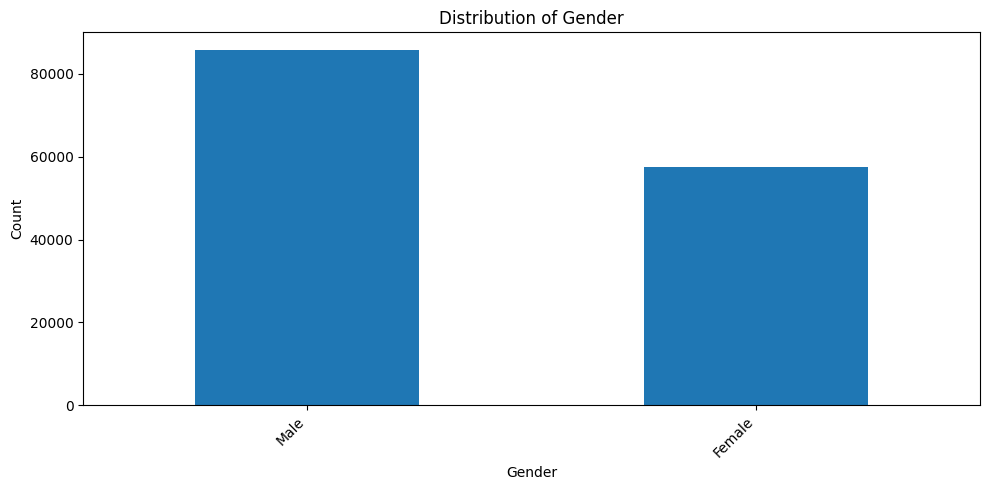

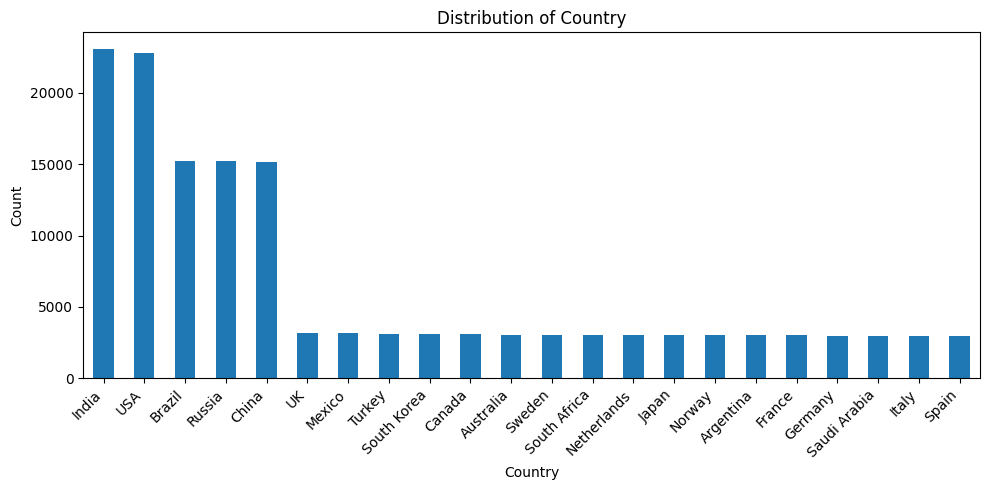

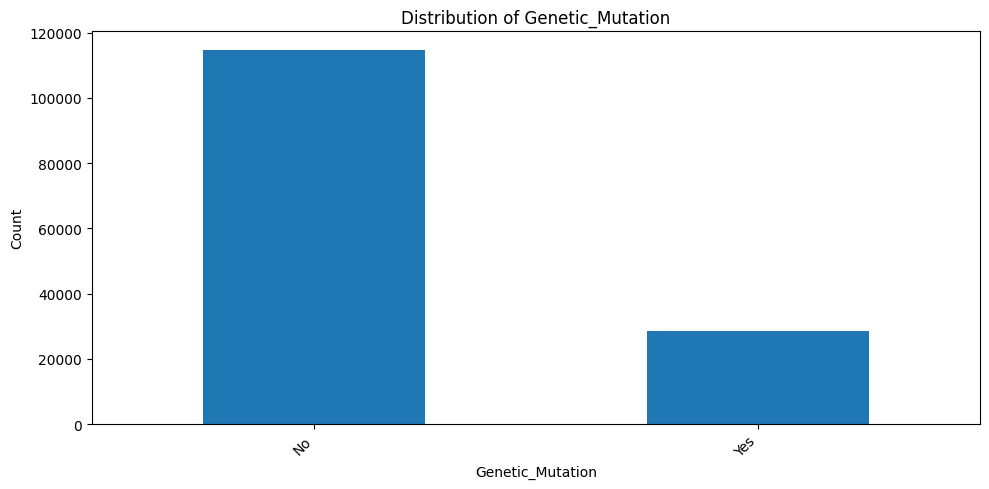

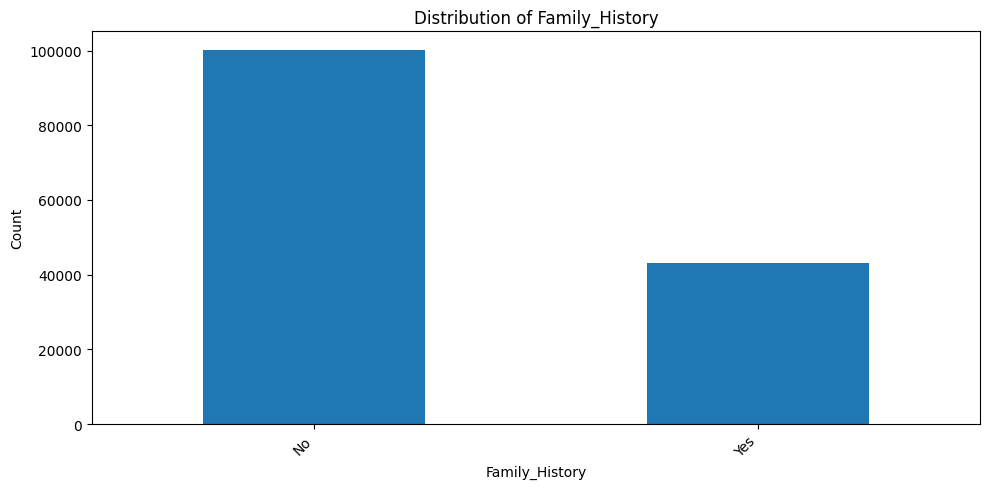

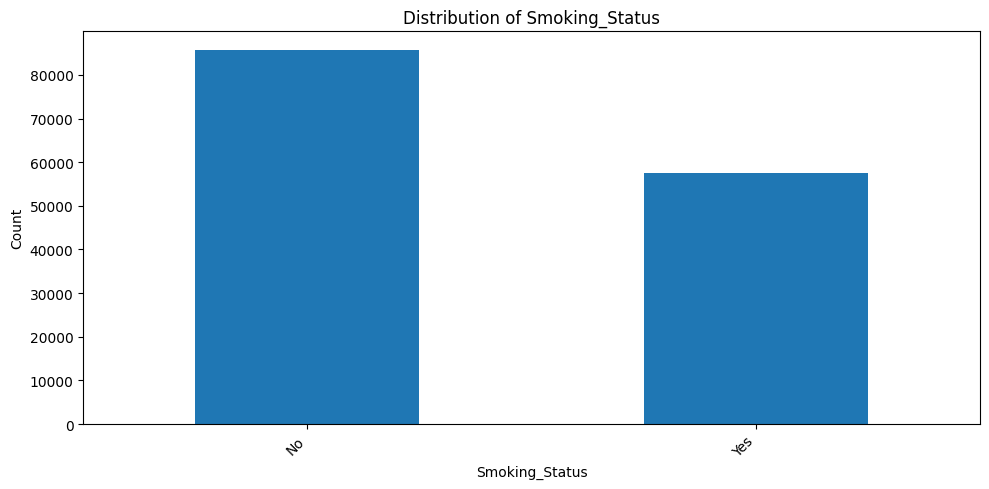

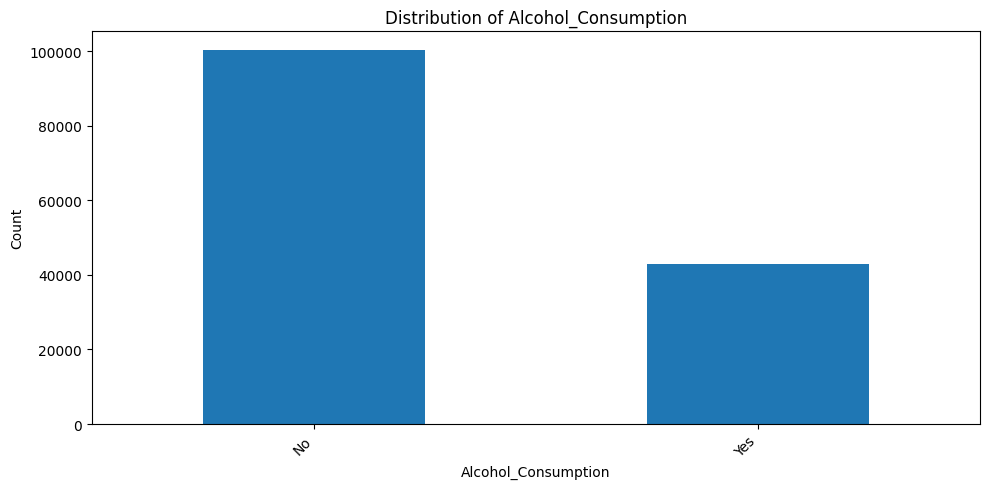

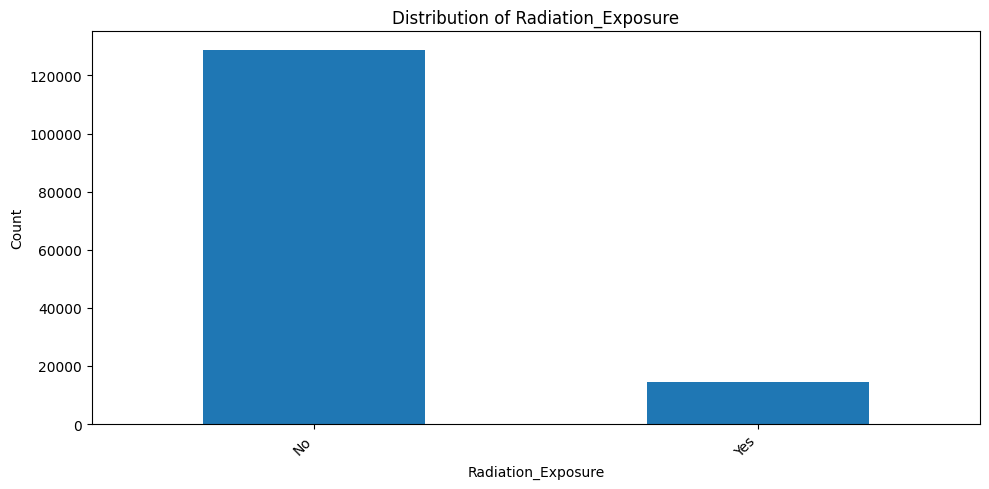

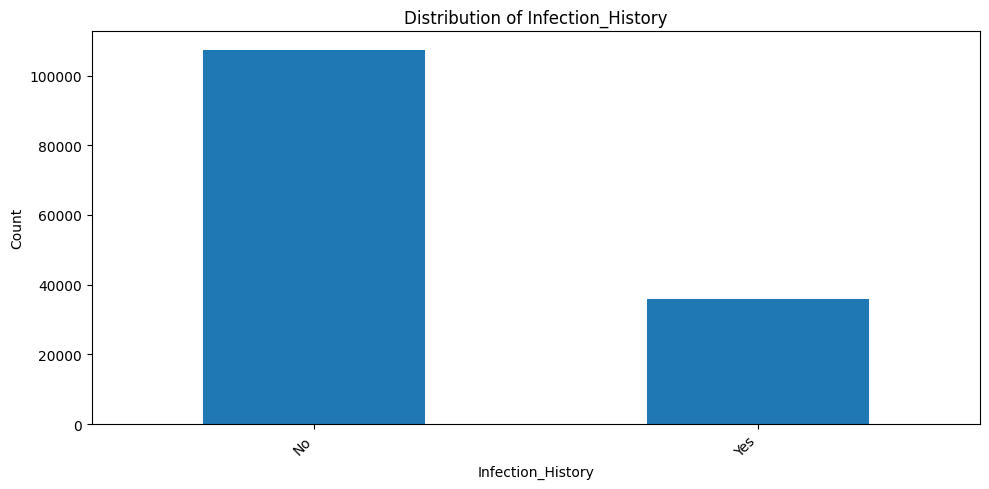

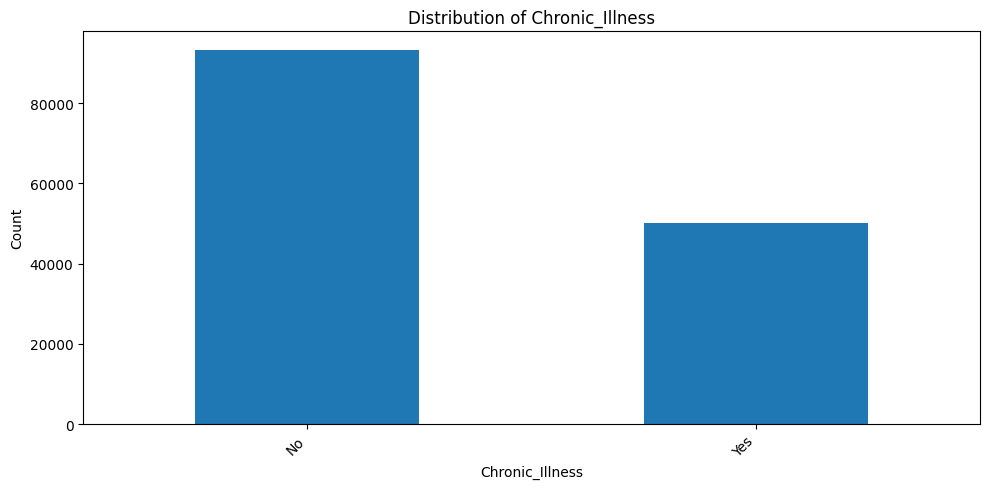

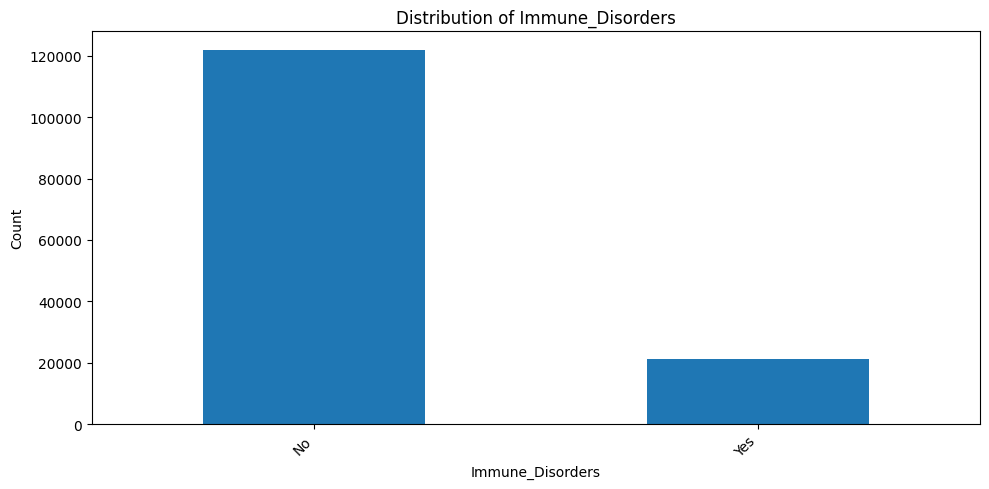

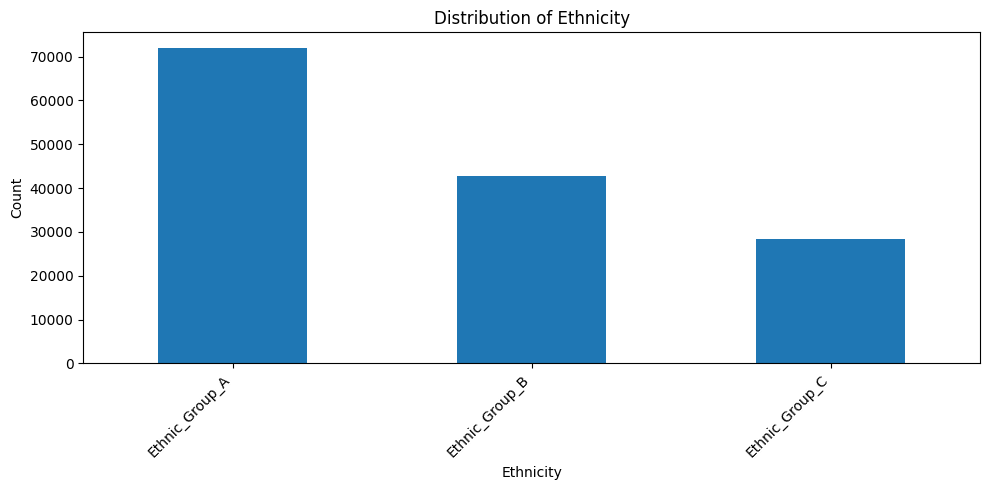

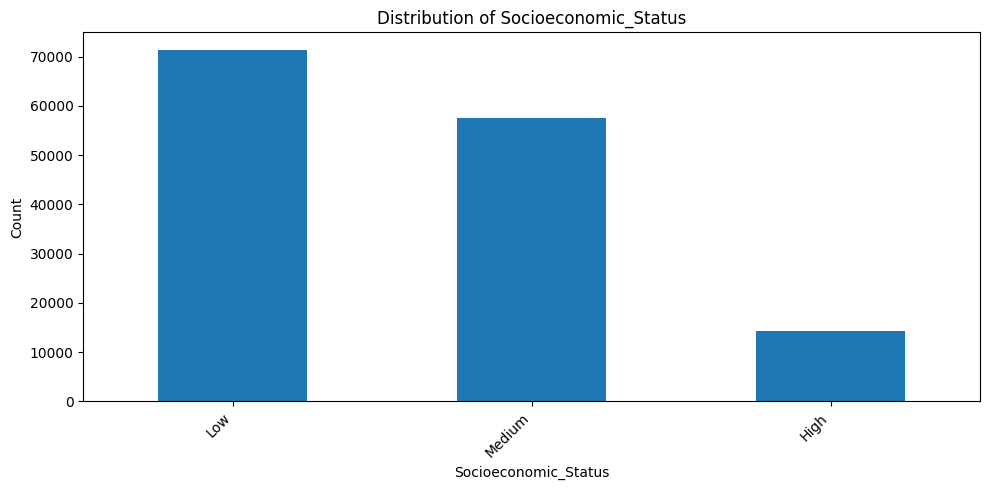

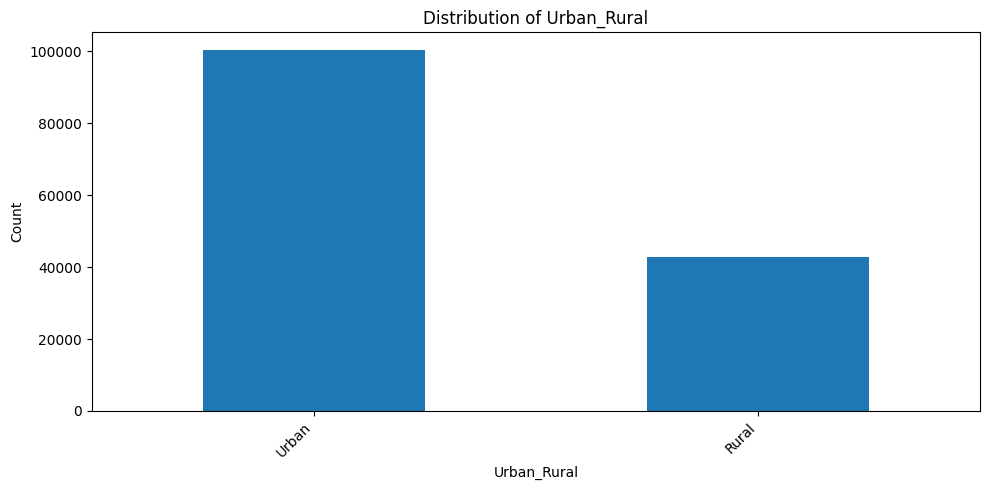

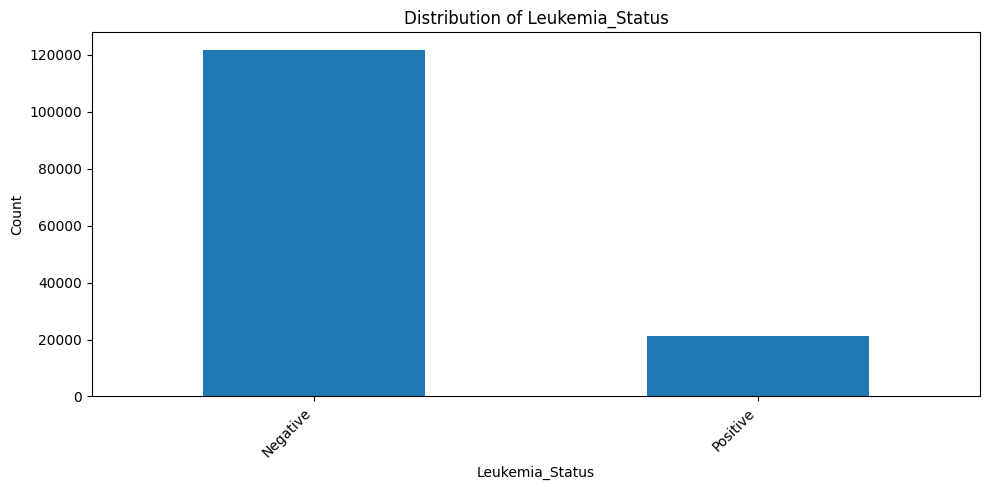

In [4]:
categorical_cols = [
    'Gender', 'Country', 'Genetic_Mutation', 'Family_History',
    'Smoking_Status', 'Alcohol_Consumption', 'Radiation_Exposure',
    'Infection_History', 'Chronic_Illness', 'Immune_Disorders',
    'Ethnicity', 'Socioeconomic_Status', 'Urban_Rural', 'Leukemia_Status'
]

# Plot
for col in categorical_cols:
    plt.figure(figsize=(10, 5))
    dataset[col].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

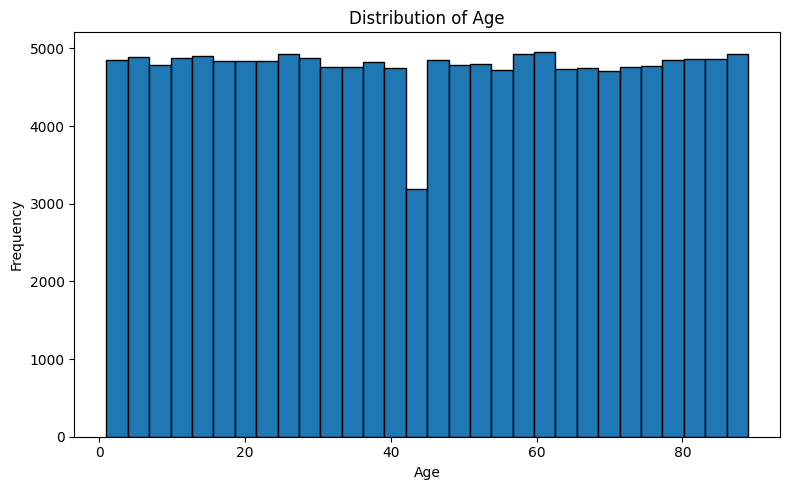

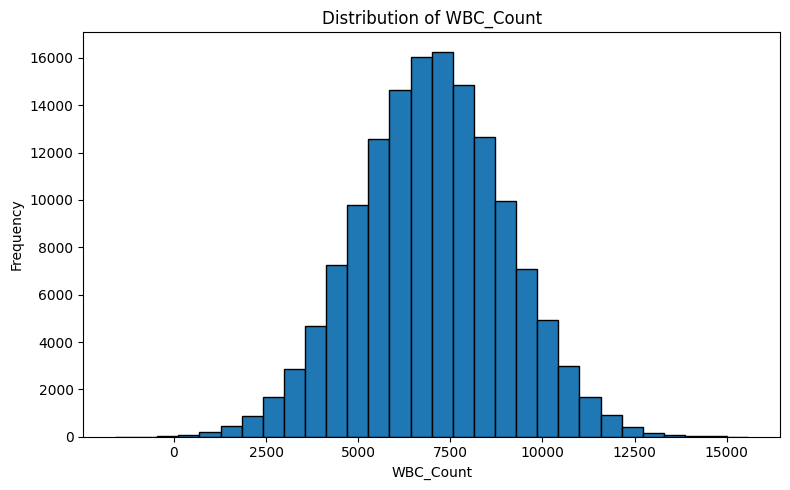

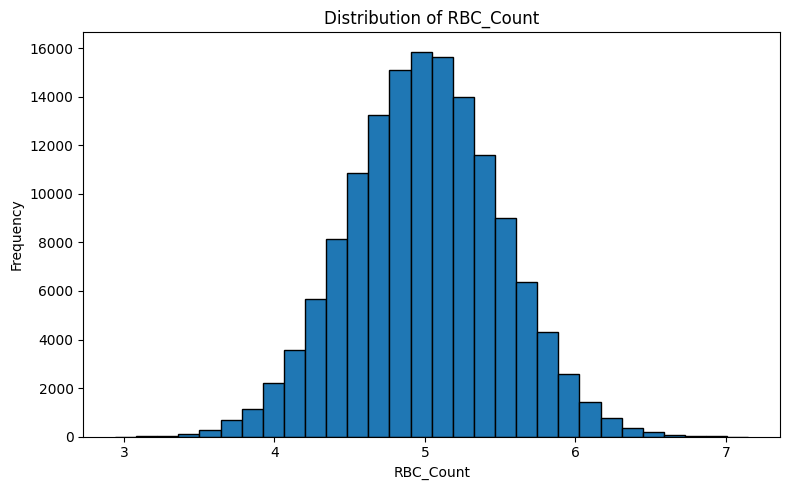

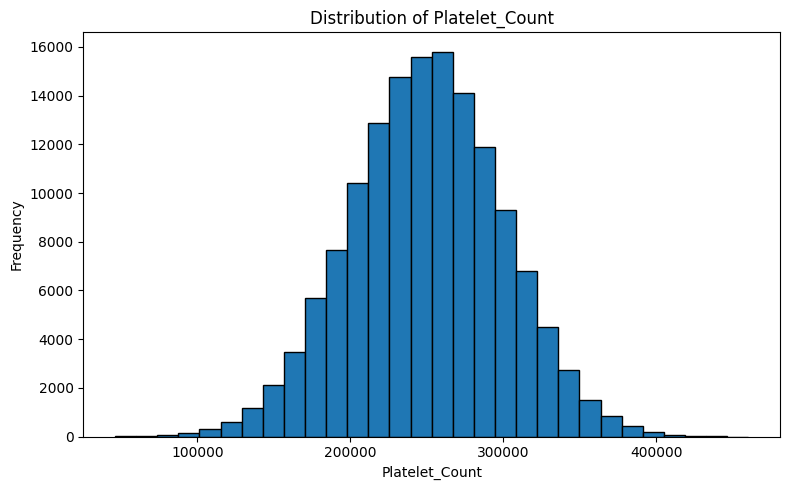

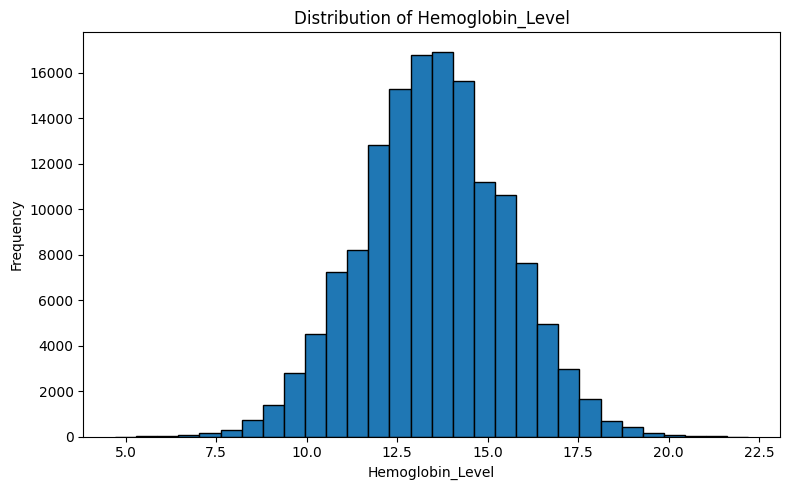

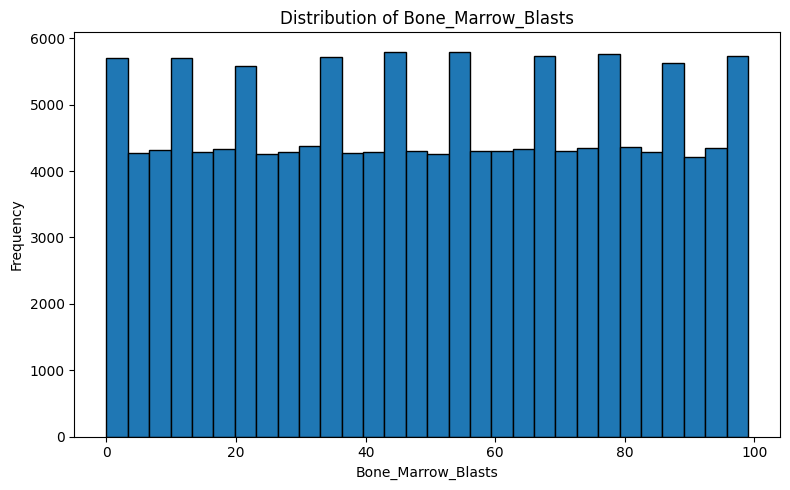

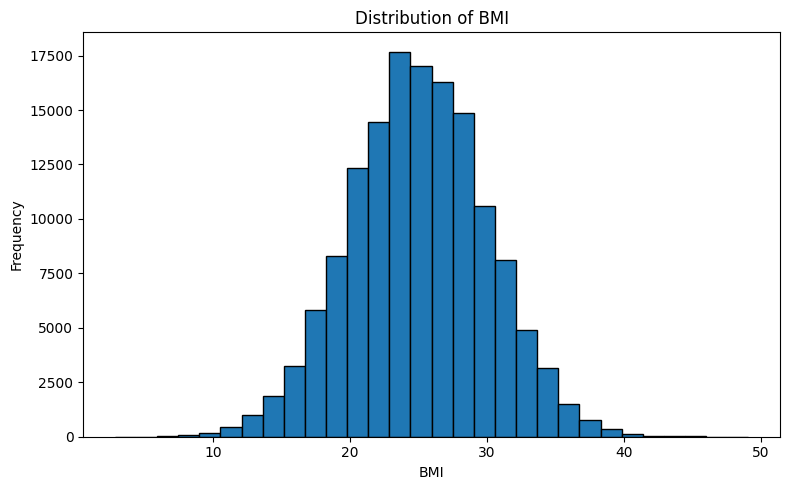

In [5]:
numeric_cols = ['Age', 'WBC_Count', 'RBC_Count', 'Platelet_Count', 'Hemoglobin_Level', 'Bone_Marrow_Blasts', 'BMI']

for col in numeric_cols:
    plt.figure(figsize=(8, 5))
    plt.hist(dataset[col], bins=30, edgecolor='black')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()


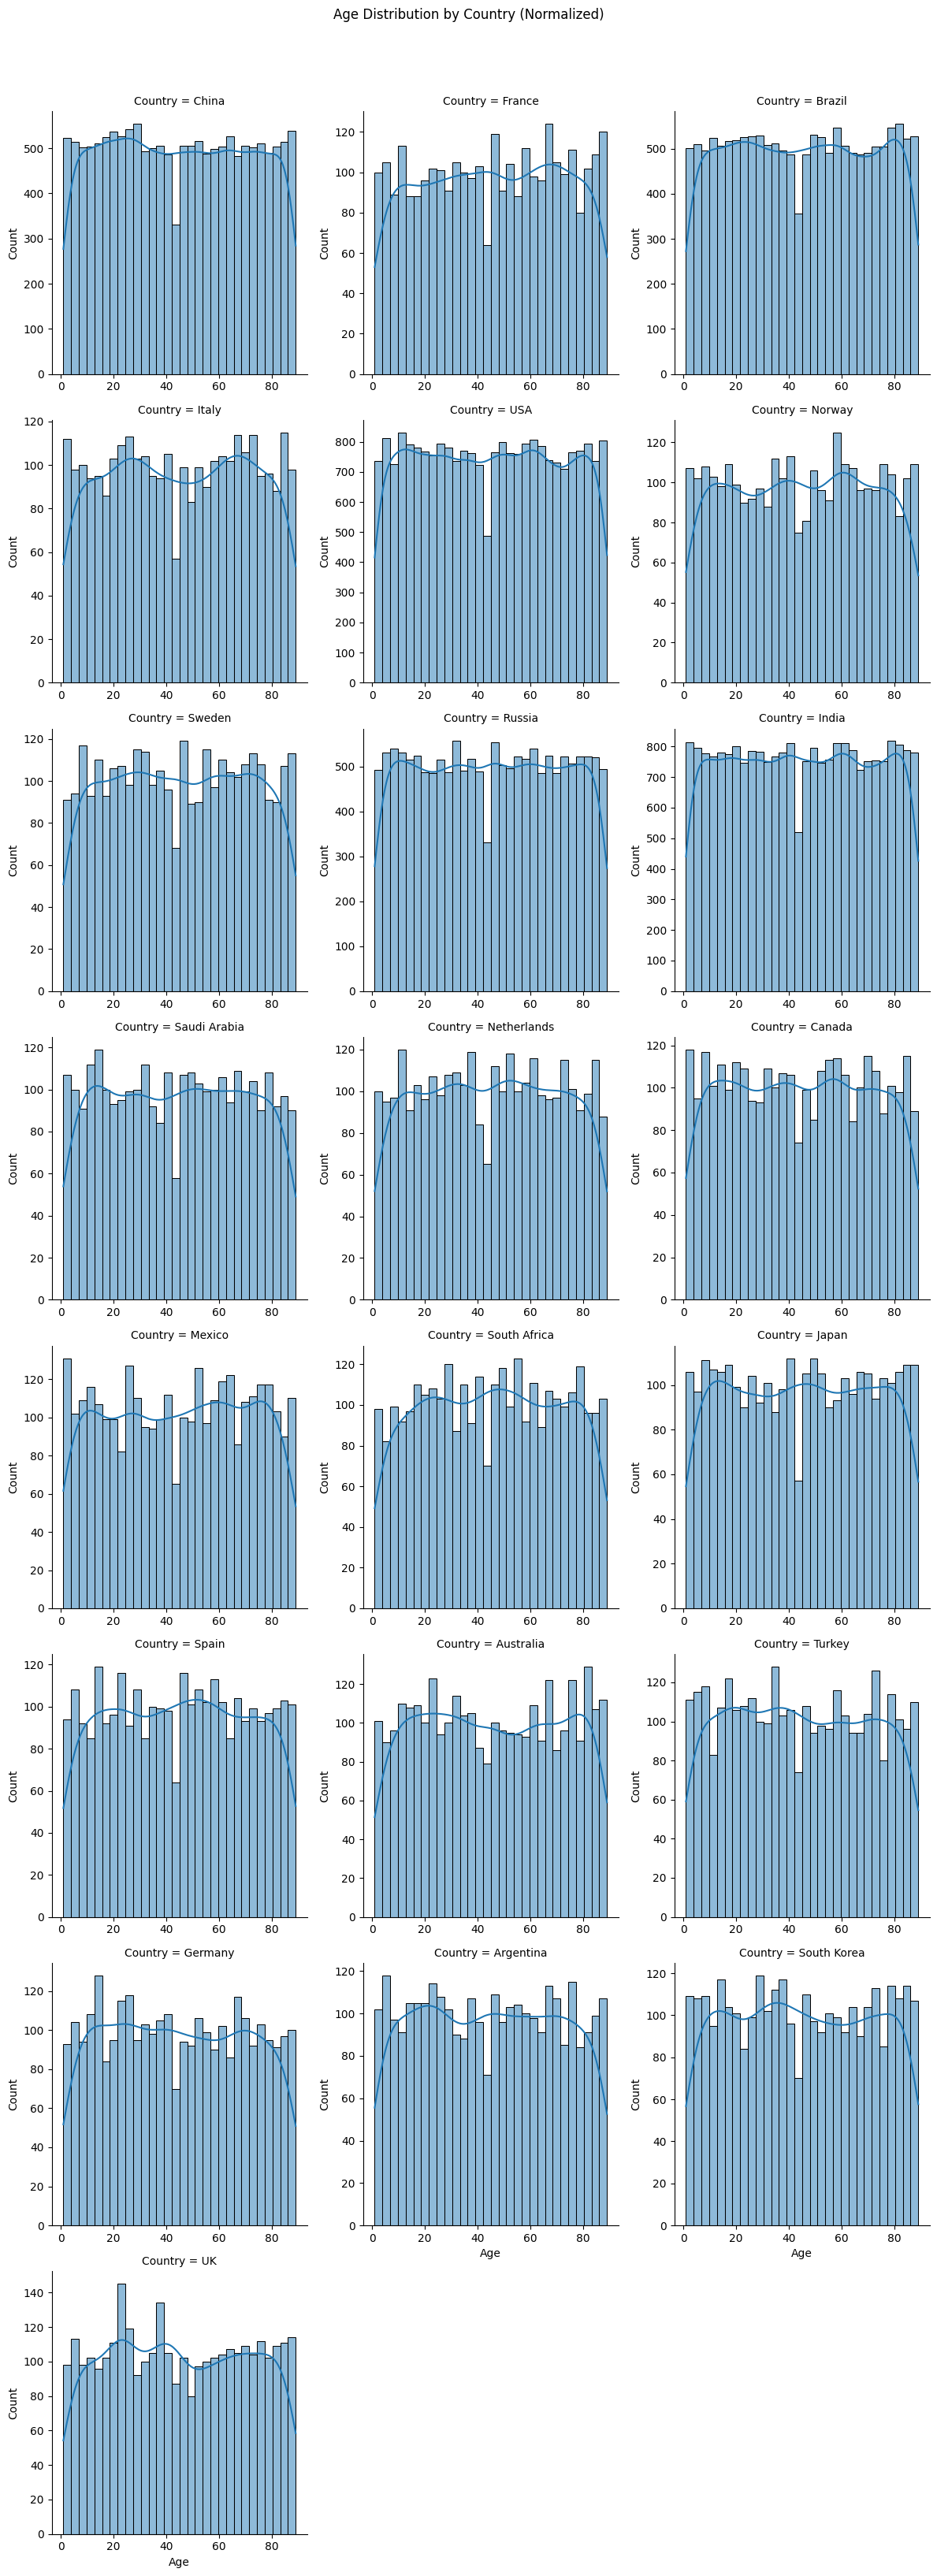

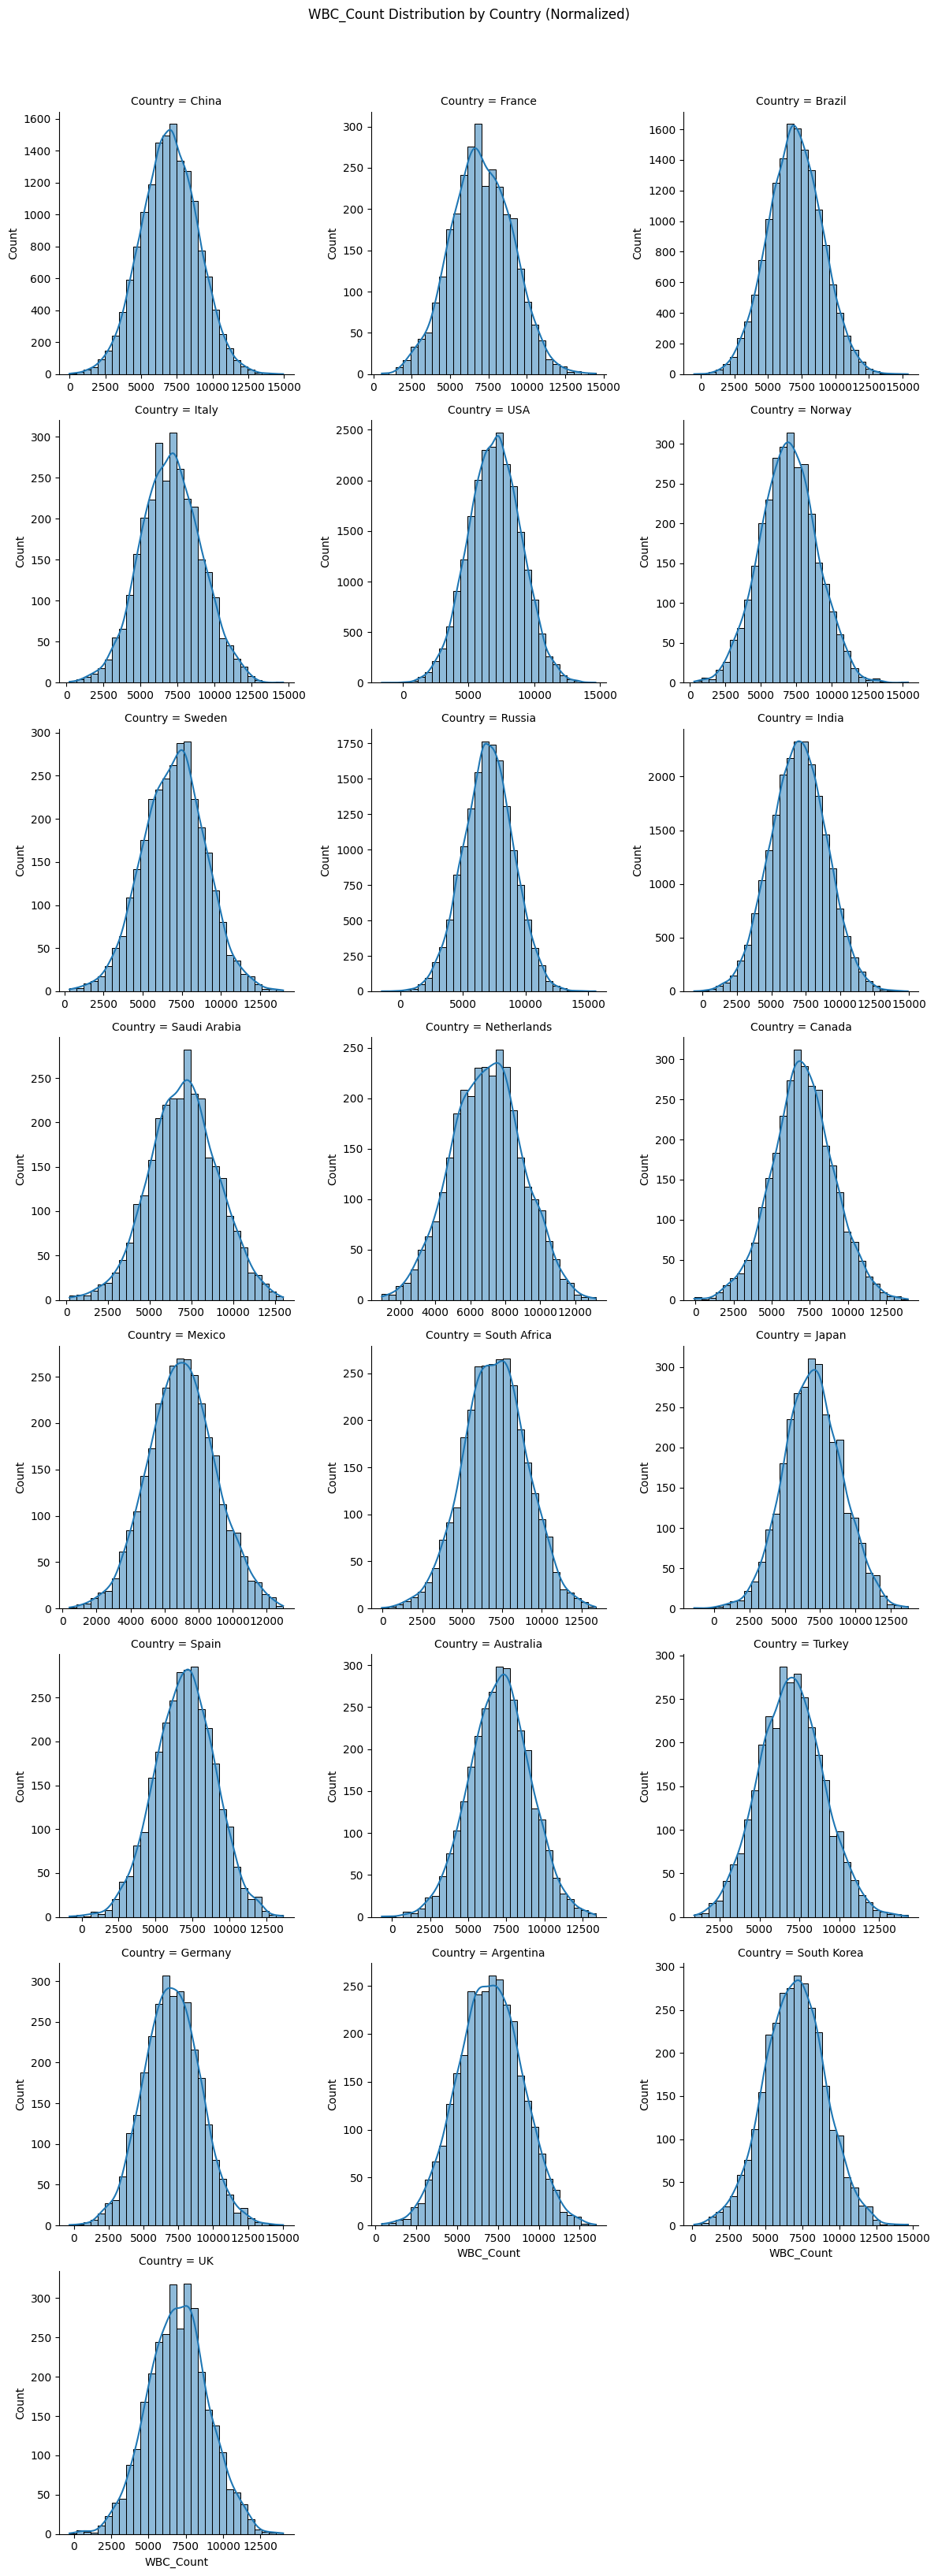

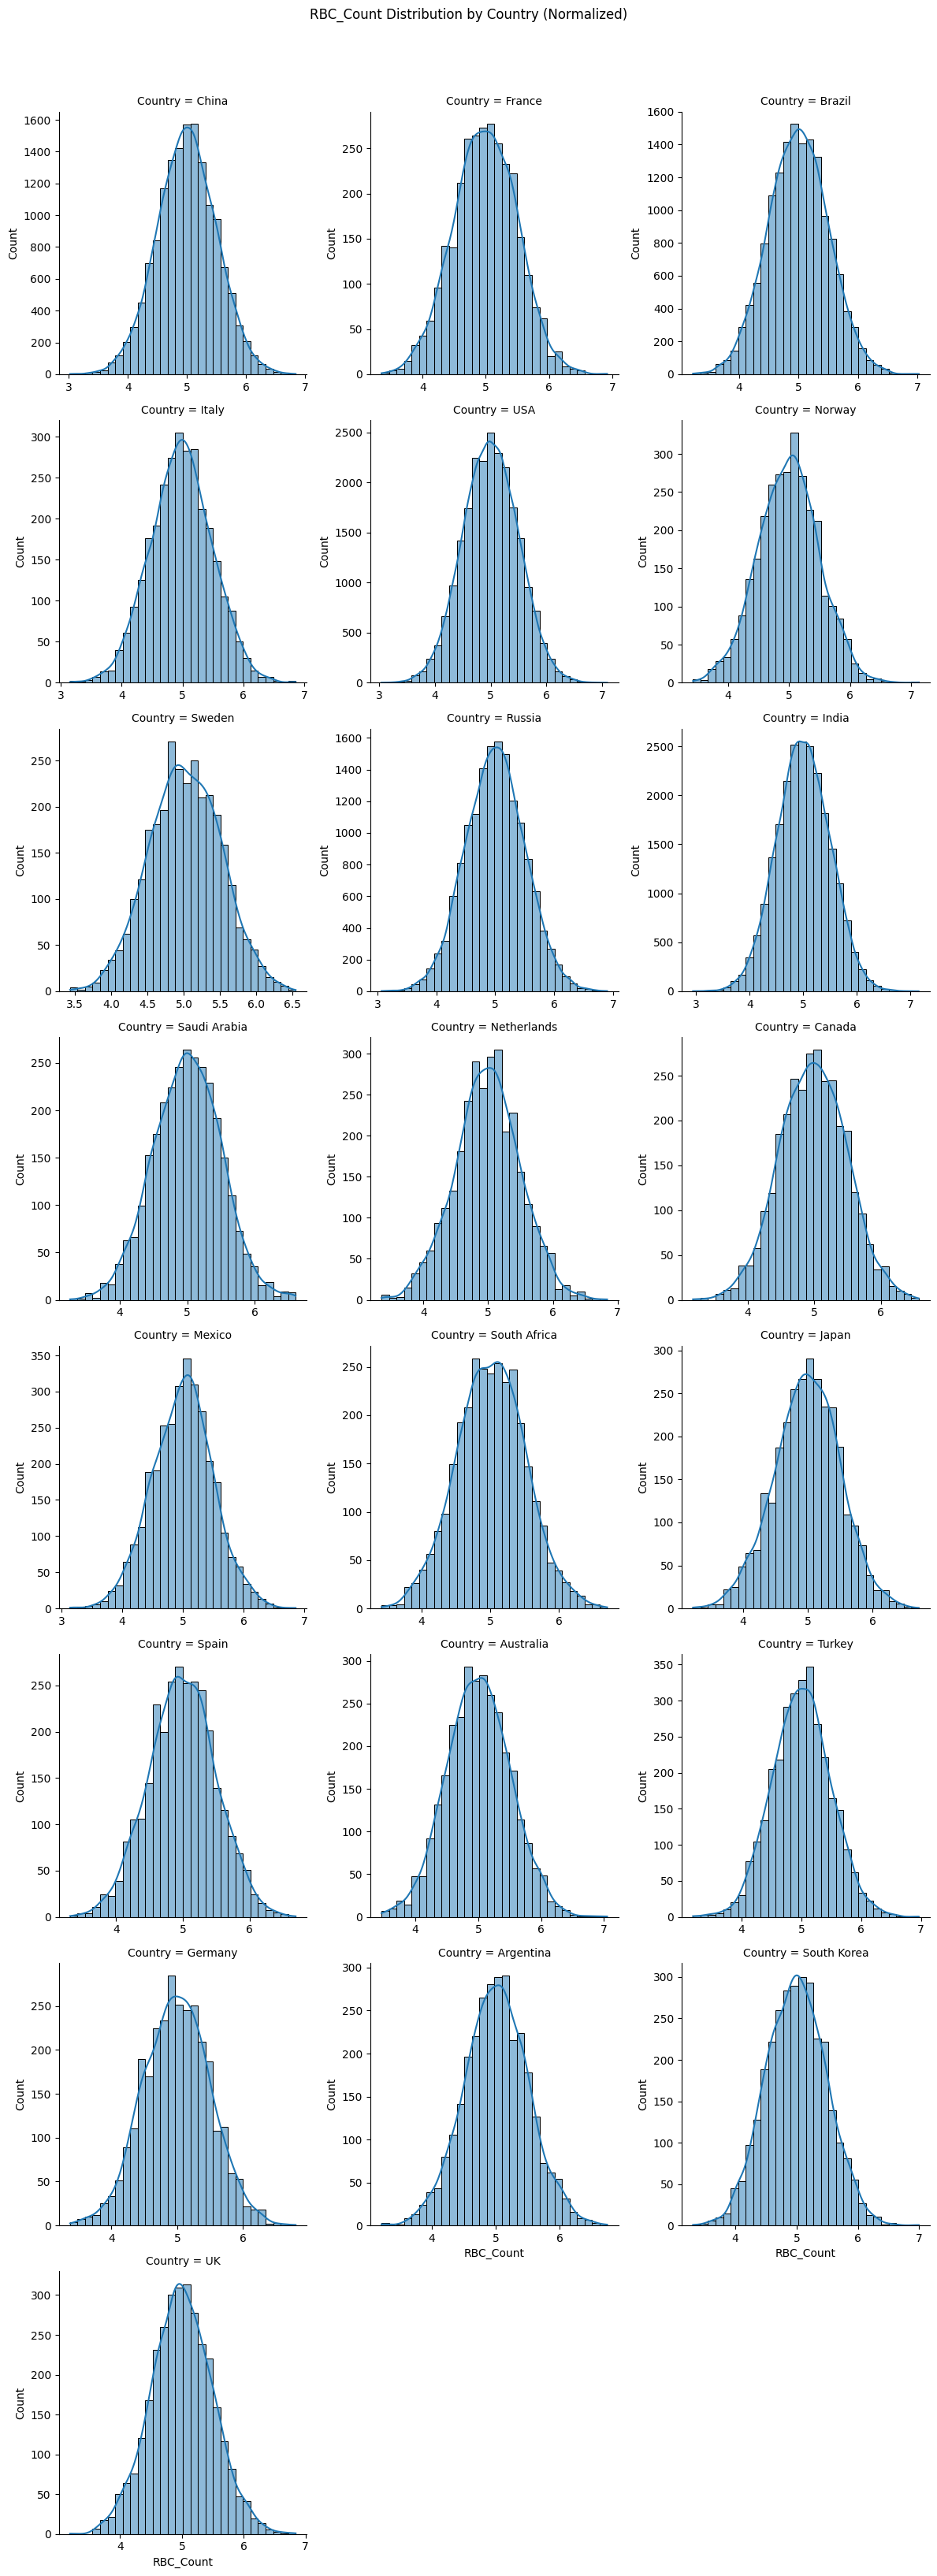

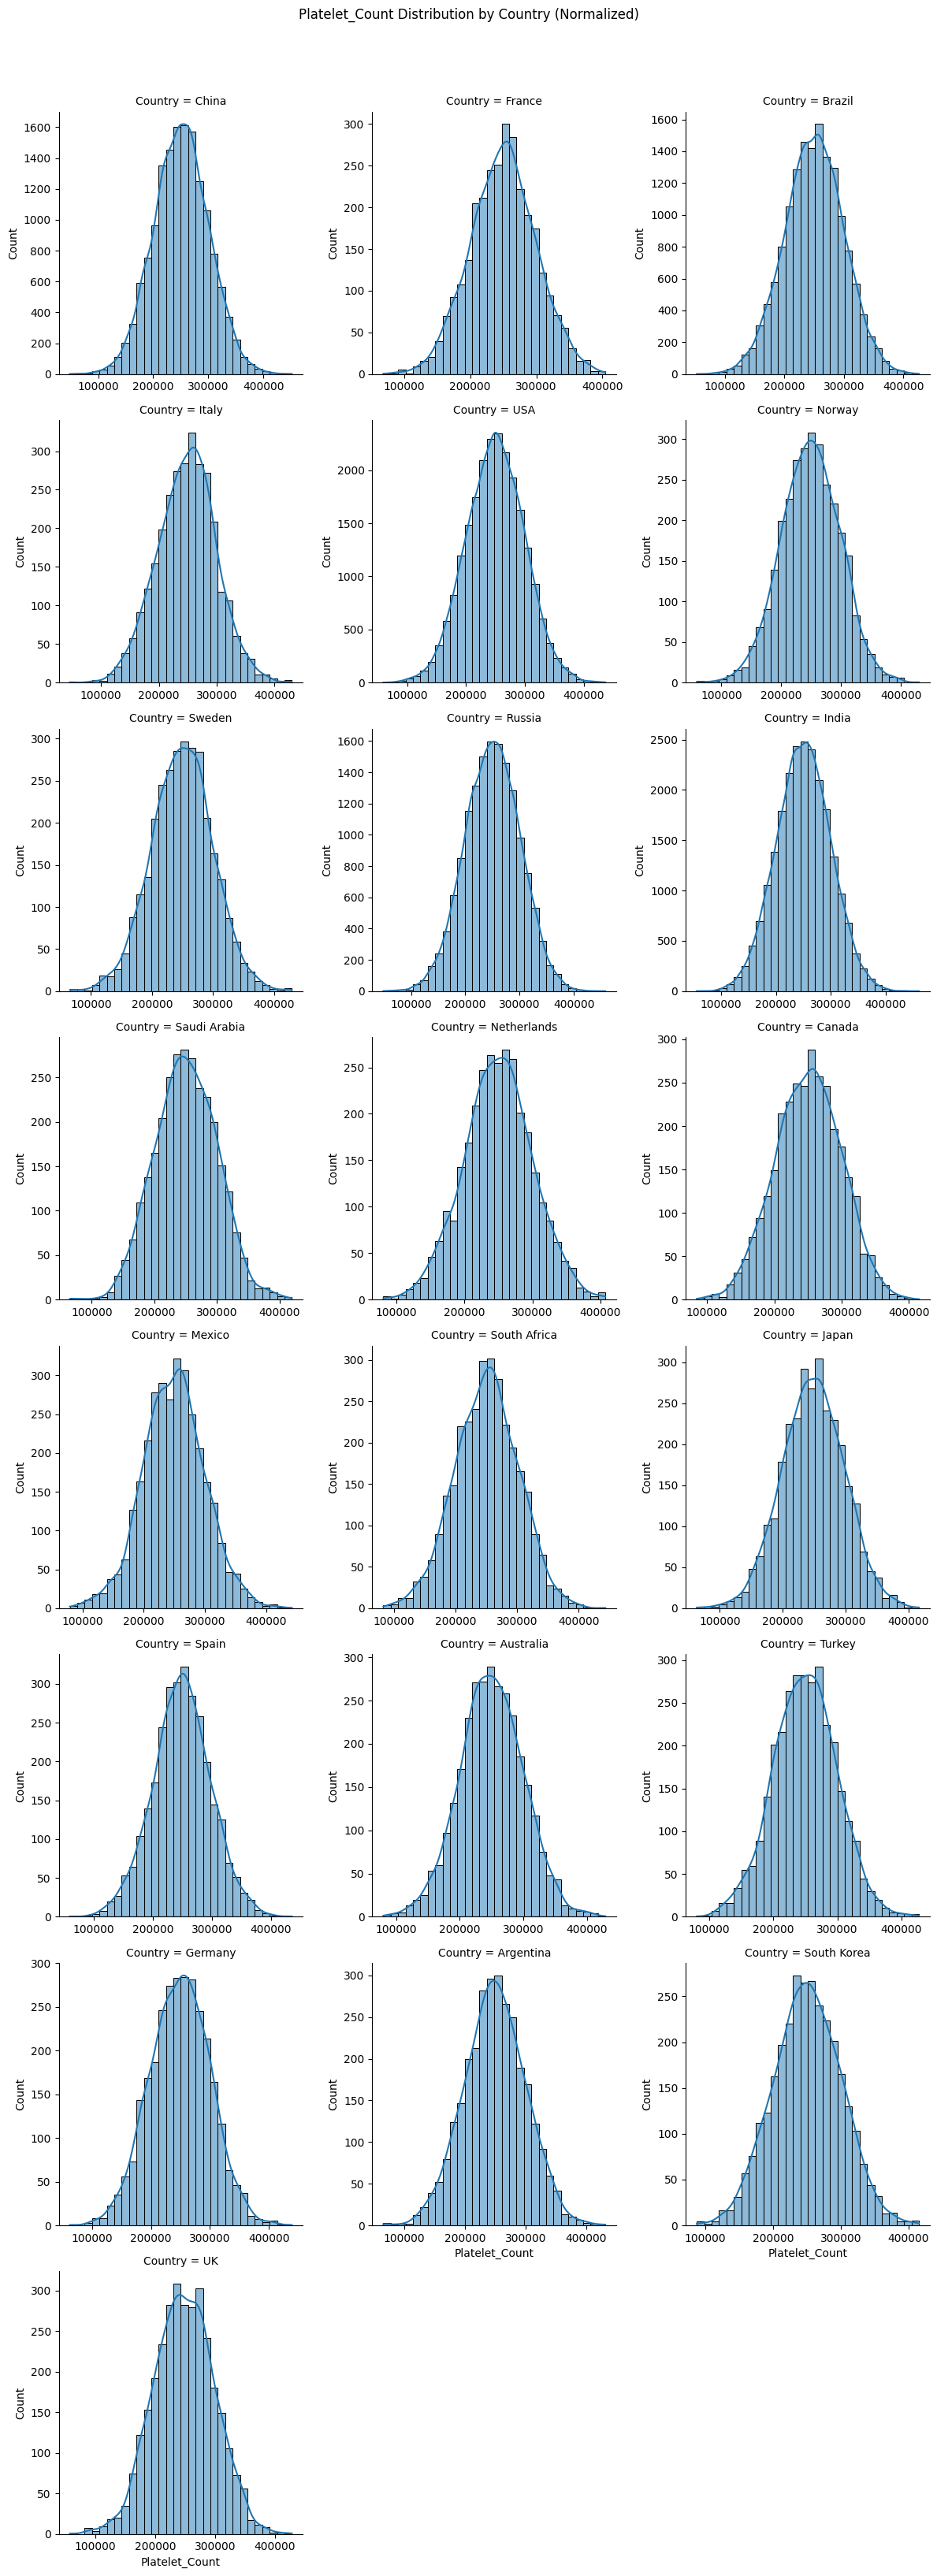

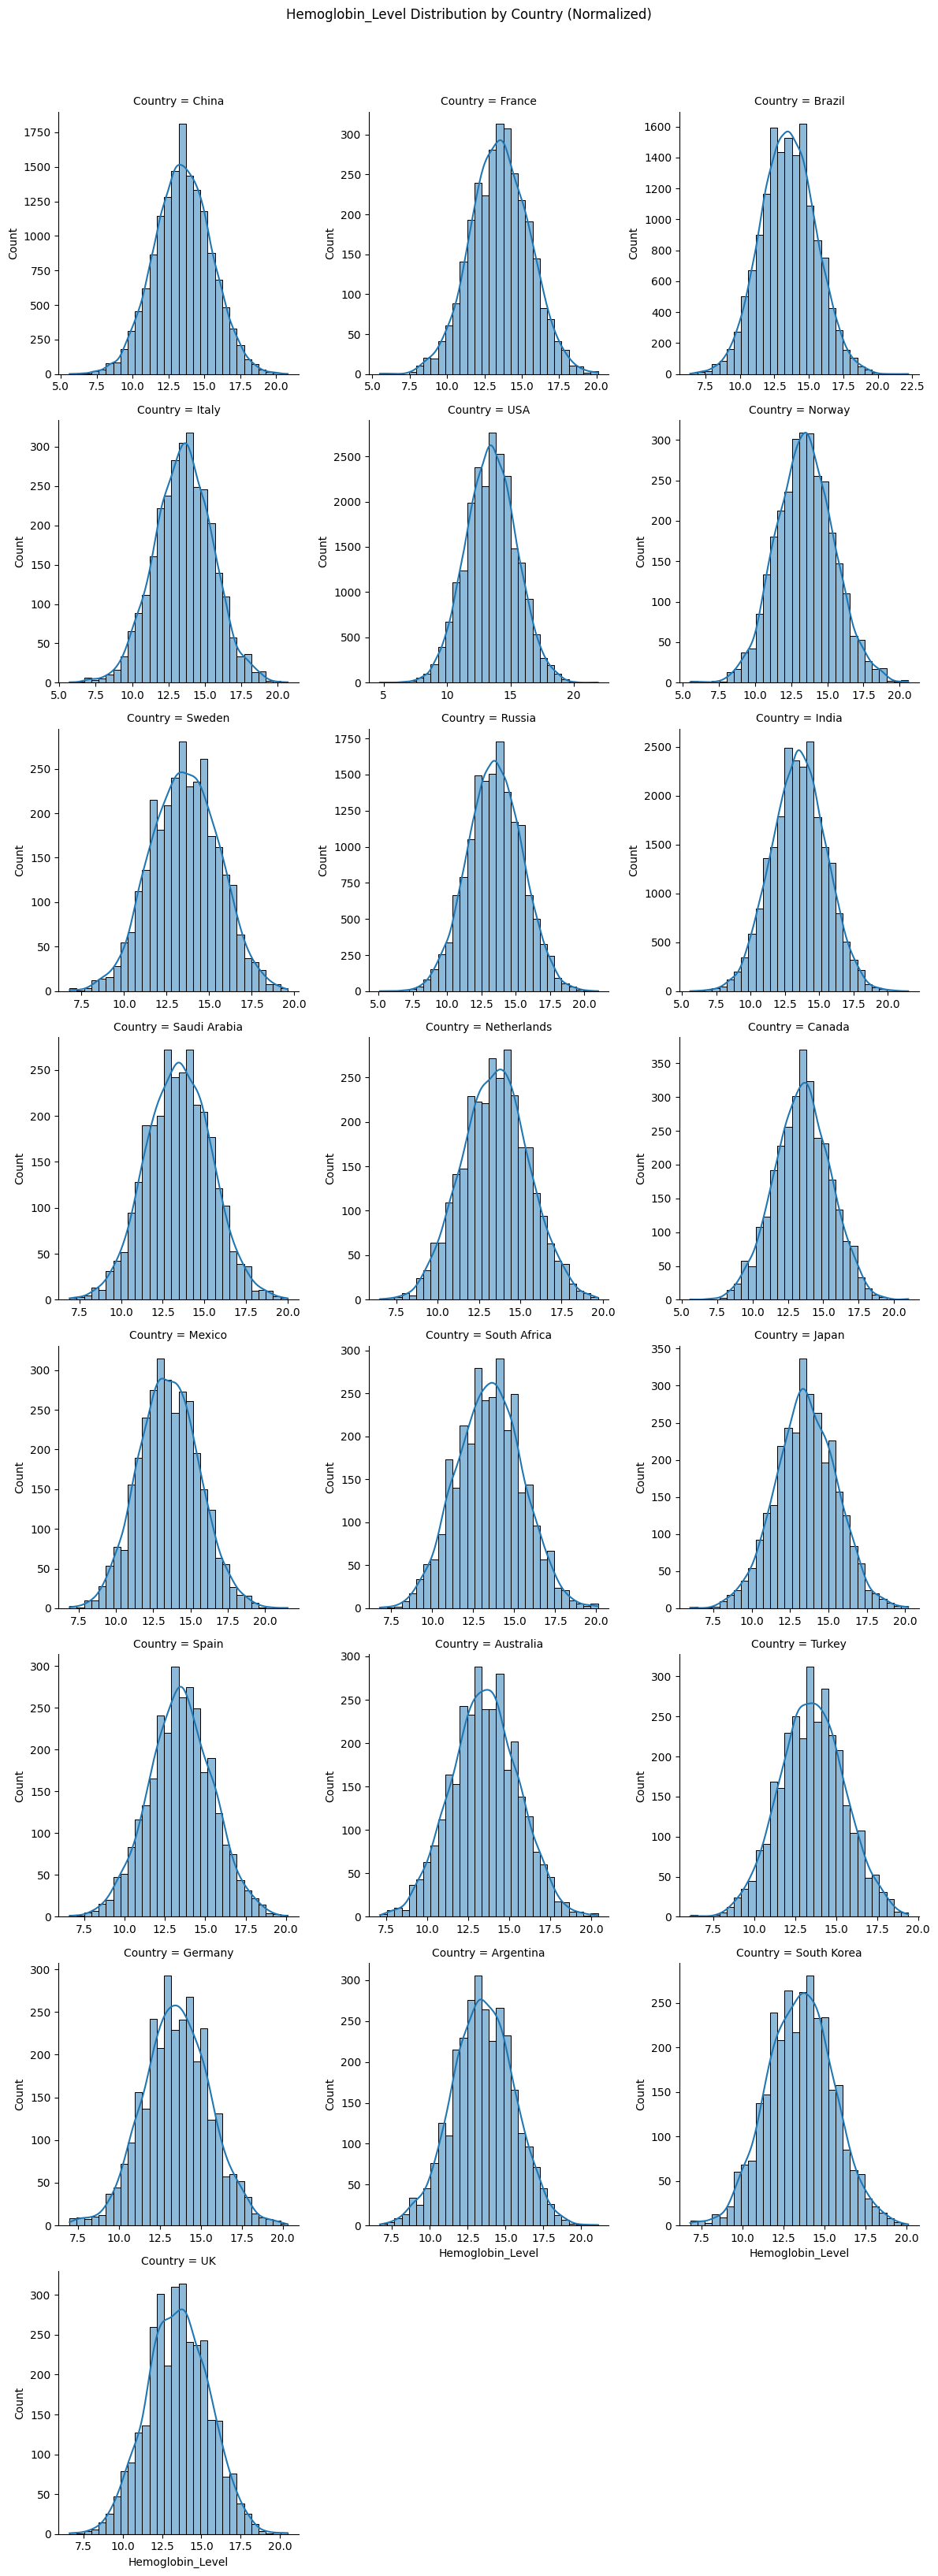

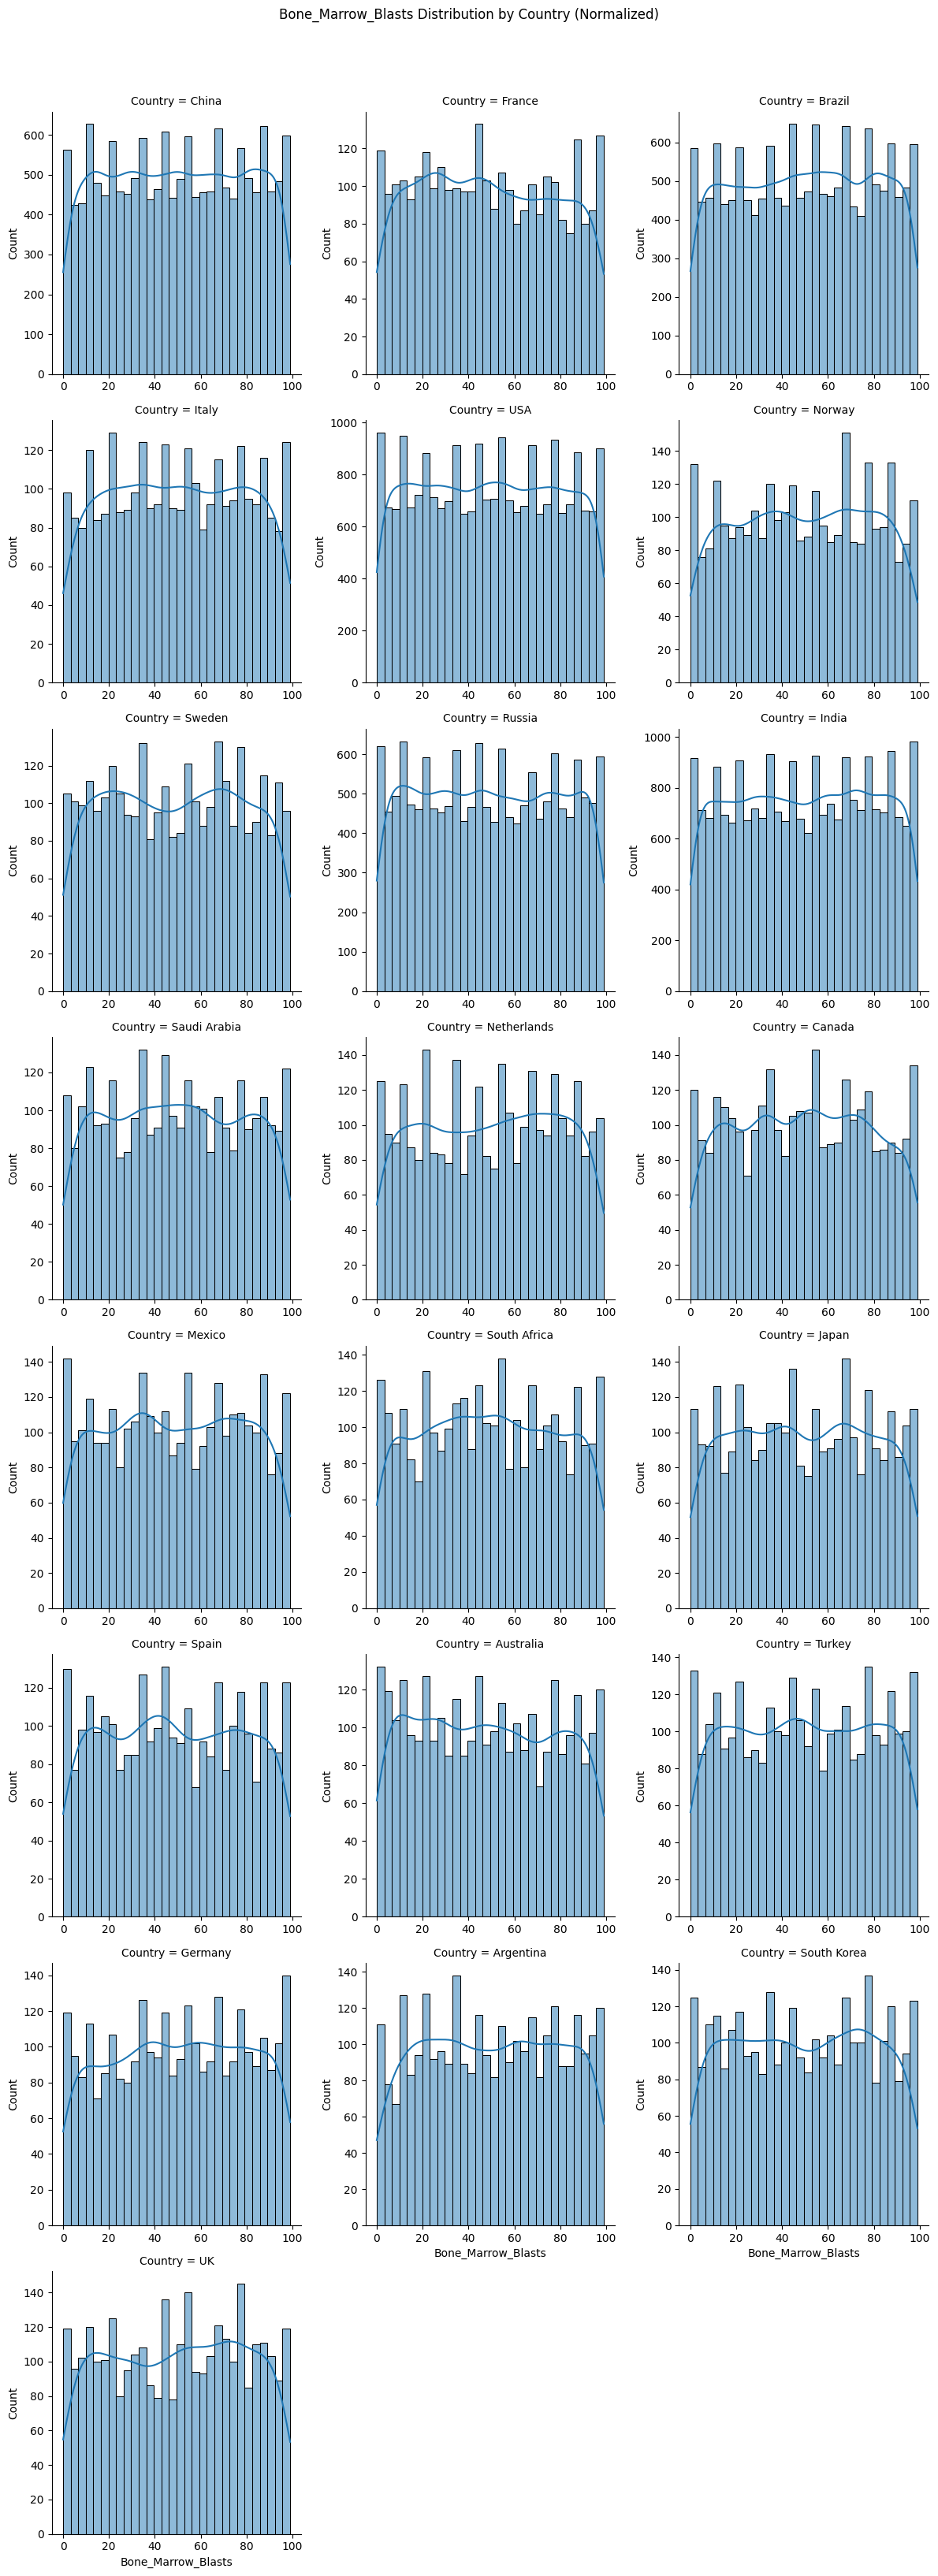

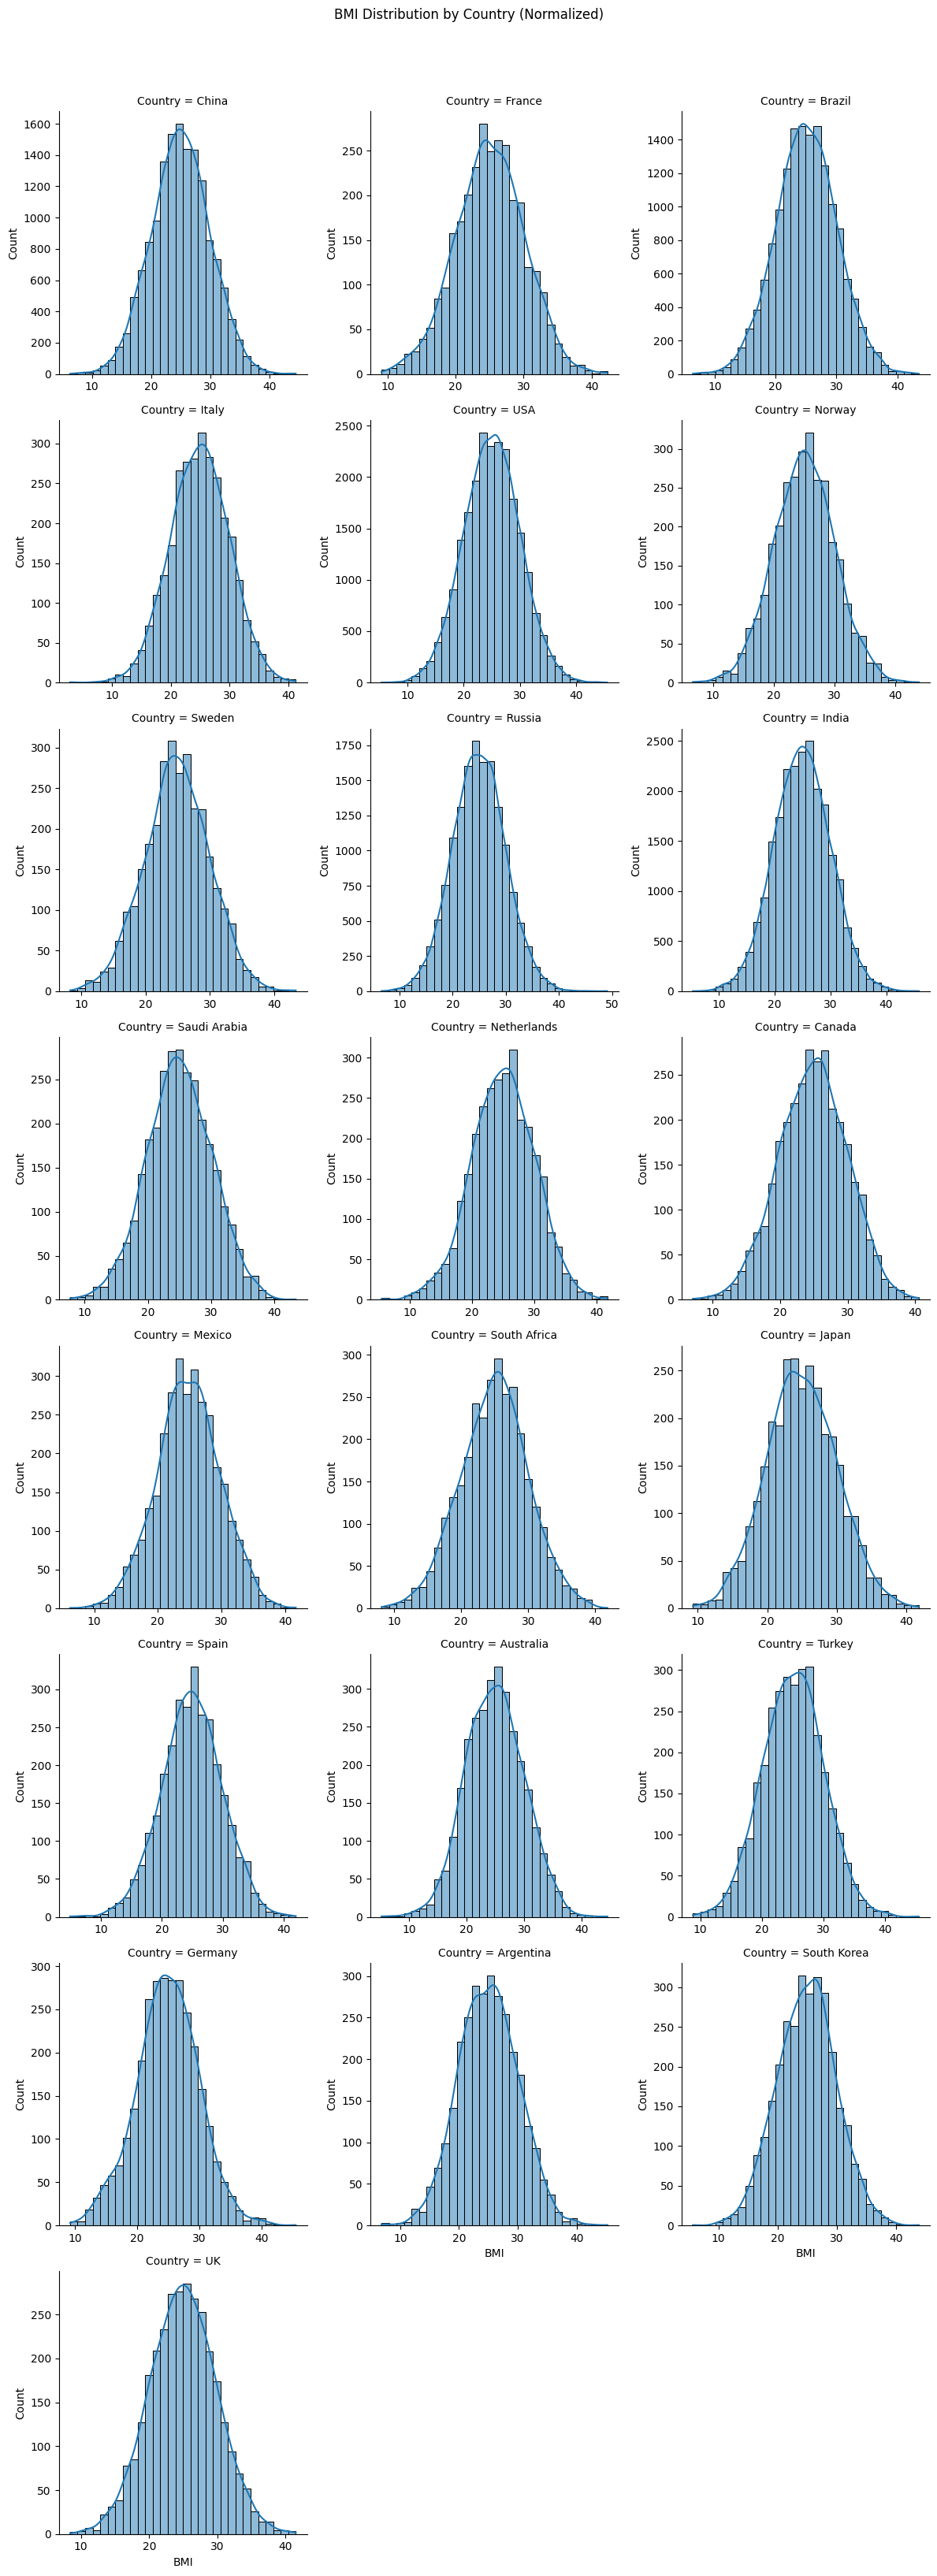

In [51]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Age', 'WBC_Count', 'RBC_Count', 'Platelet_Count', 
                'Hemoglobin_Level', 'Bone_Marrow_Blasts', 'BMI']

for col in numeric_cols:
    g = sns.FacetGrid(dataset, col='Country', col_wrap=3, height=4, sharex=False, sharey=False)
    g.map(sns.histplot, col, bins=30, kde=True)  # <-- normalize here
    g.fig.suptitle(f'{col} Distribution by Country (Normalized)', y=1.02)
    plt.tight_layout()
    plt.show()



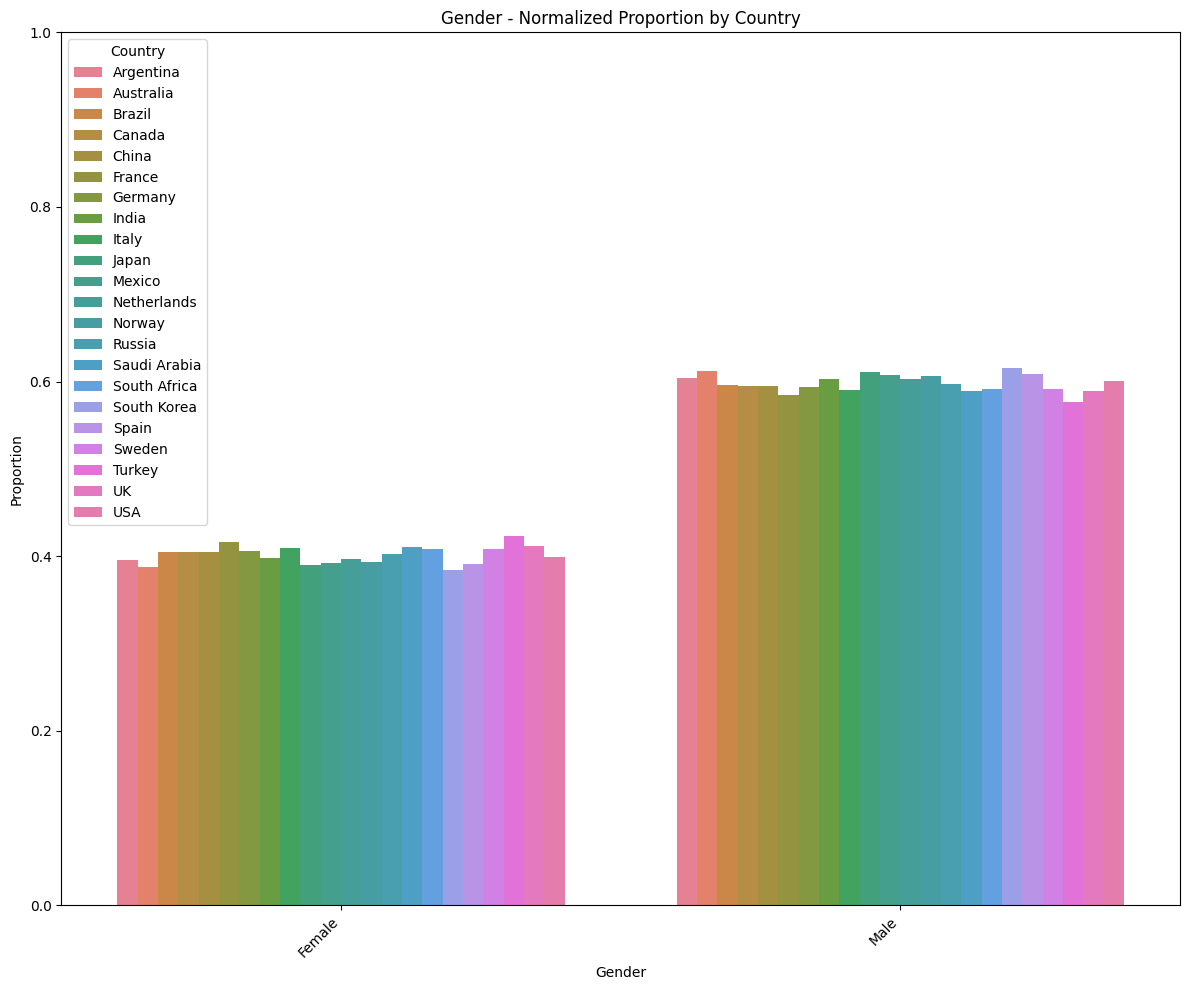

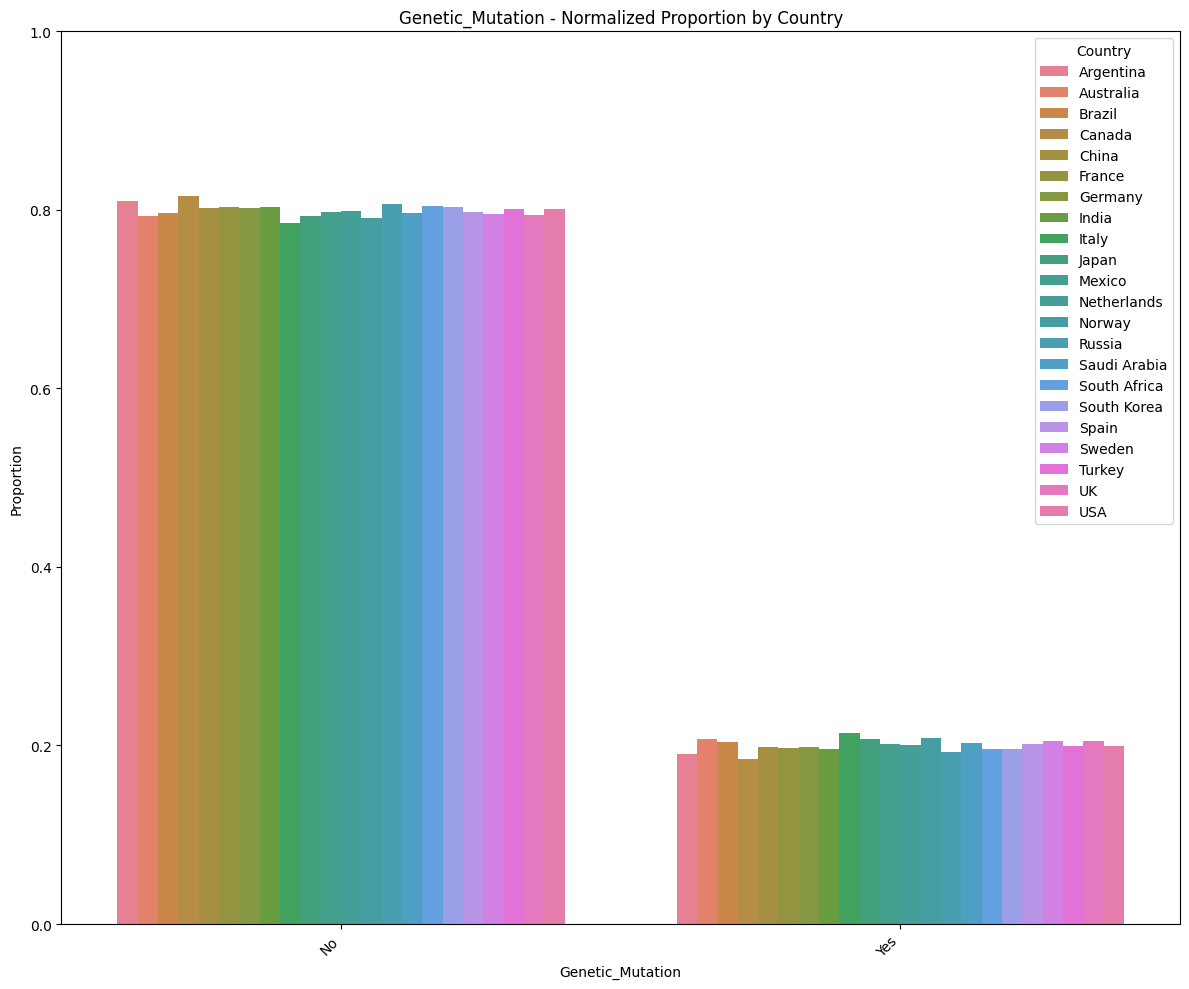

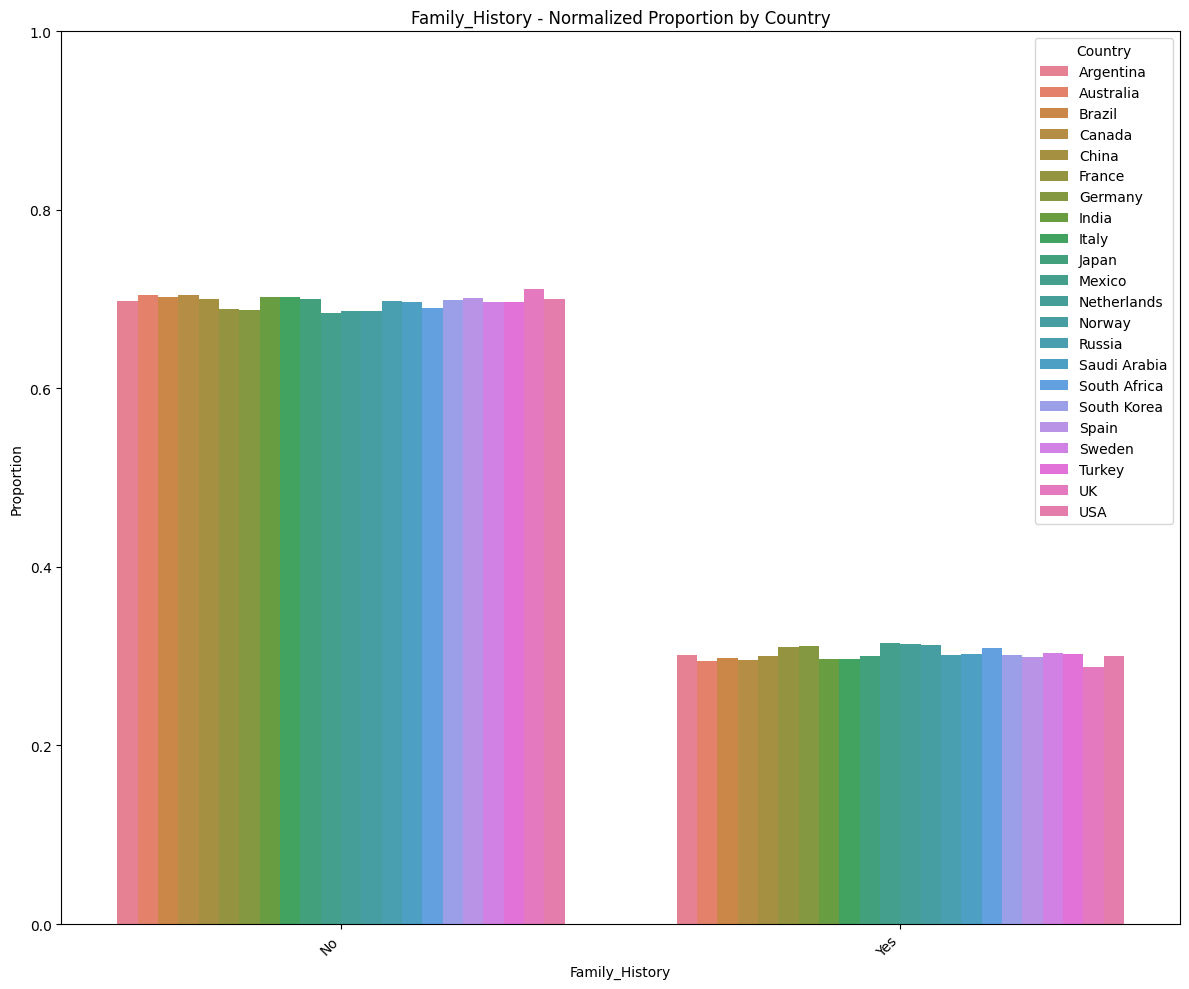

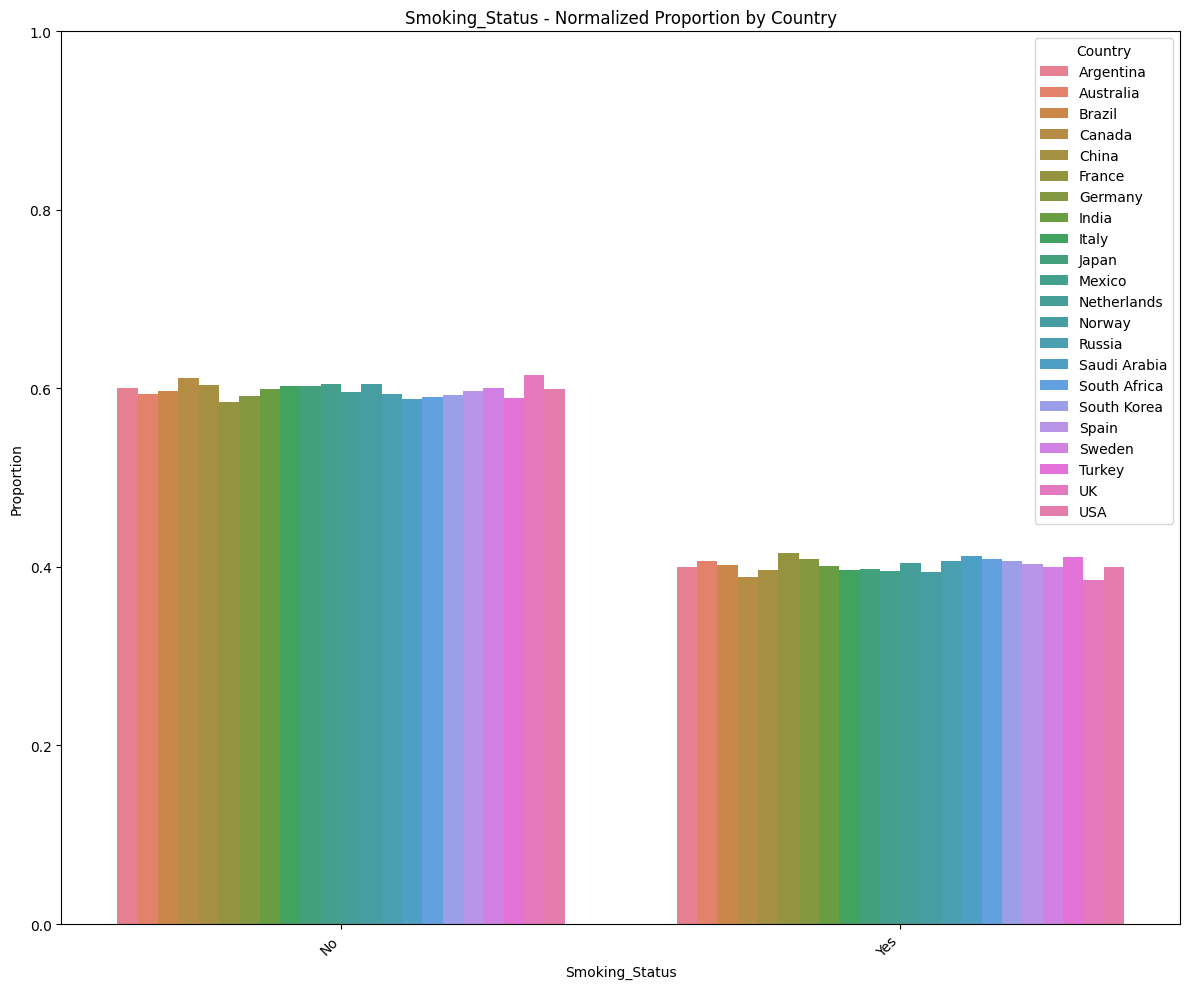

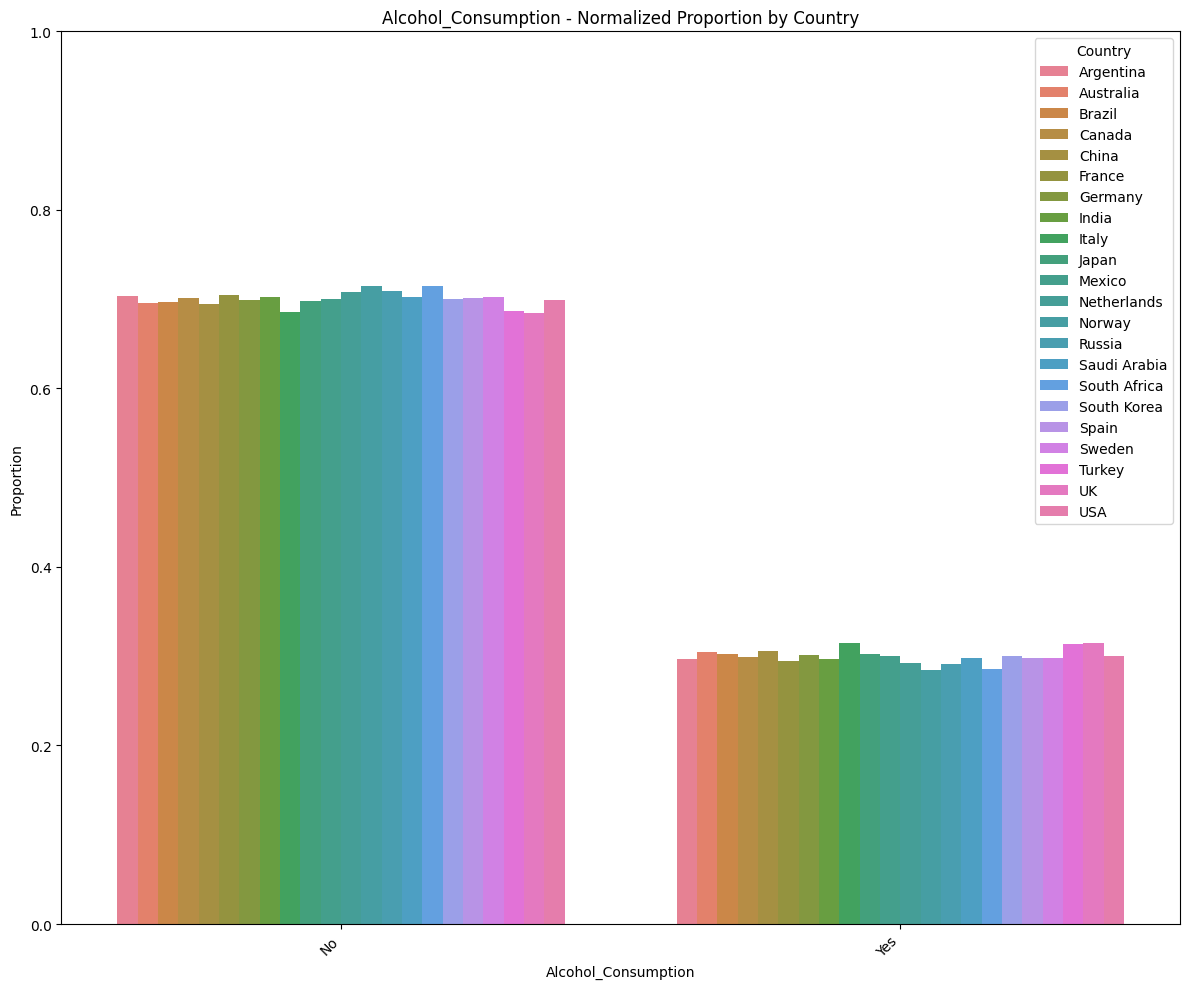

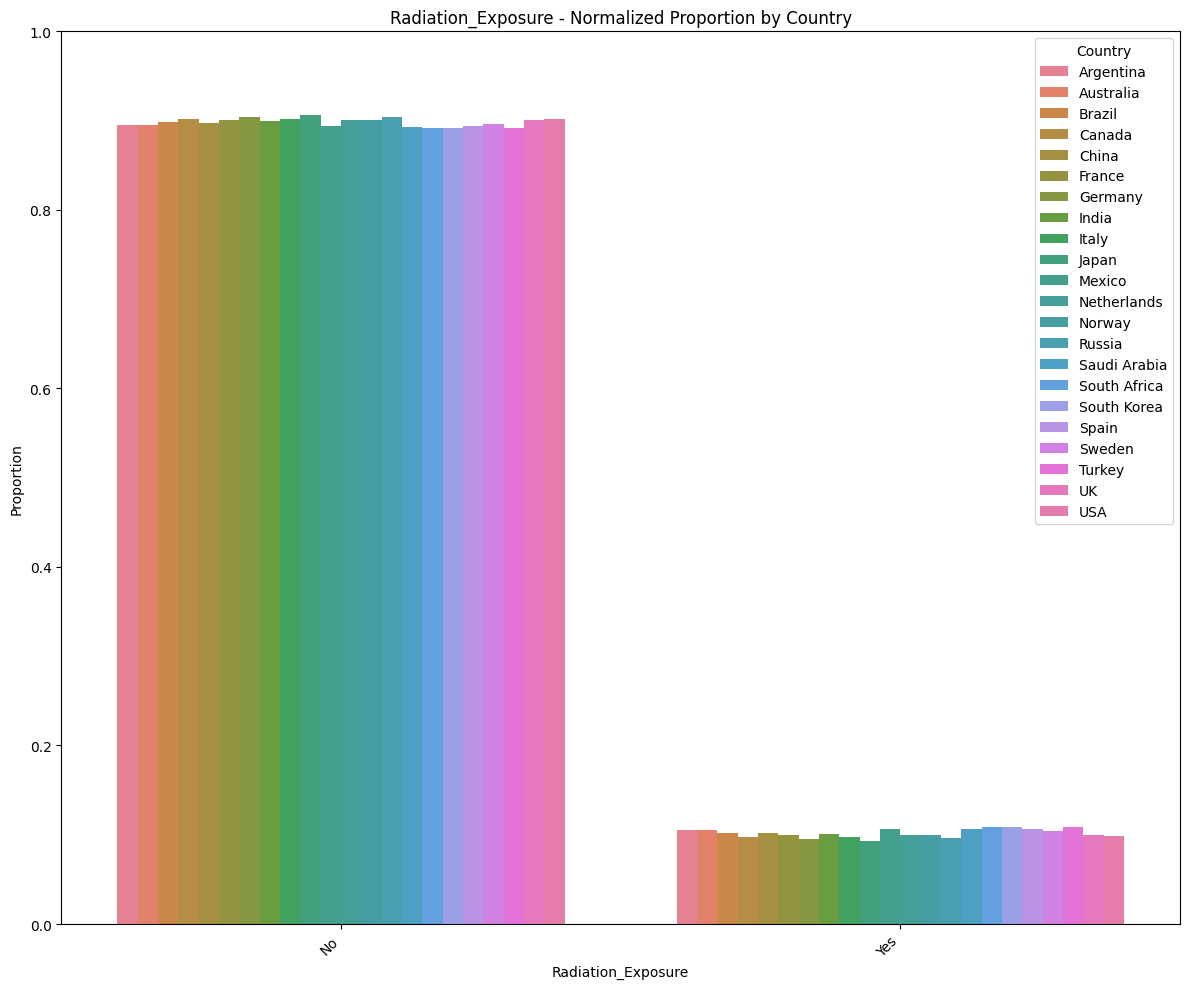

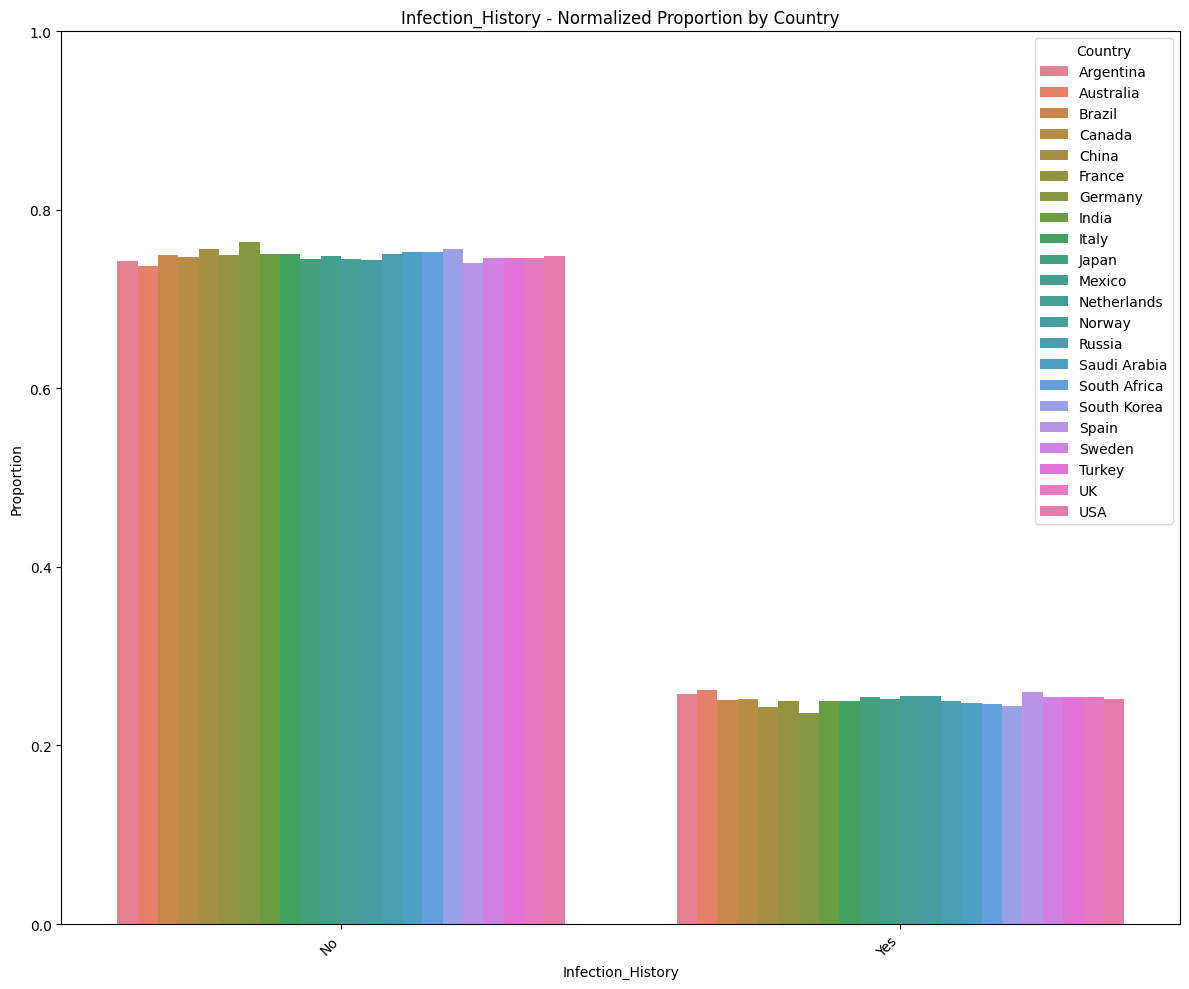

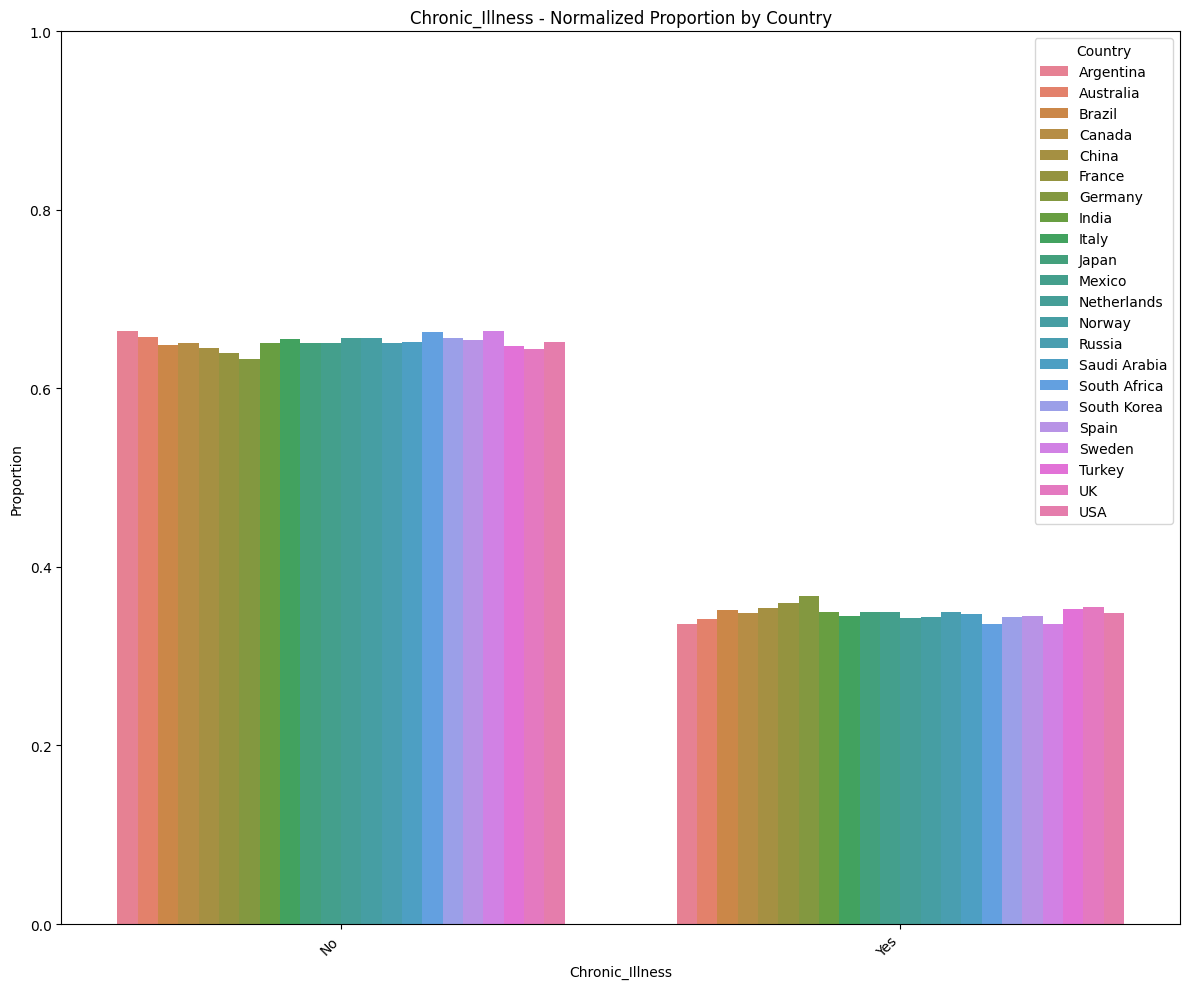

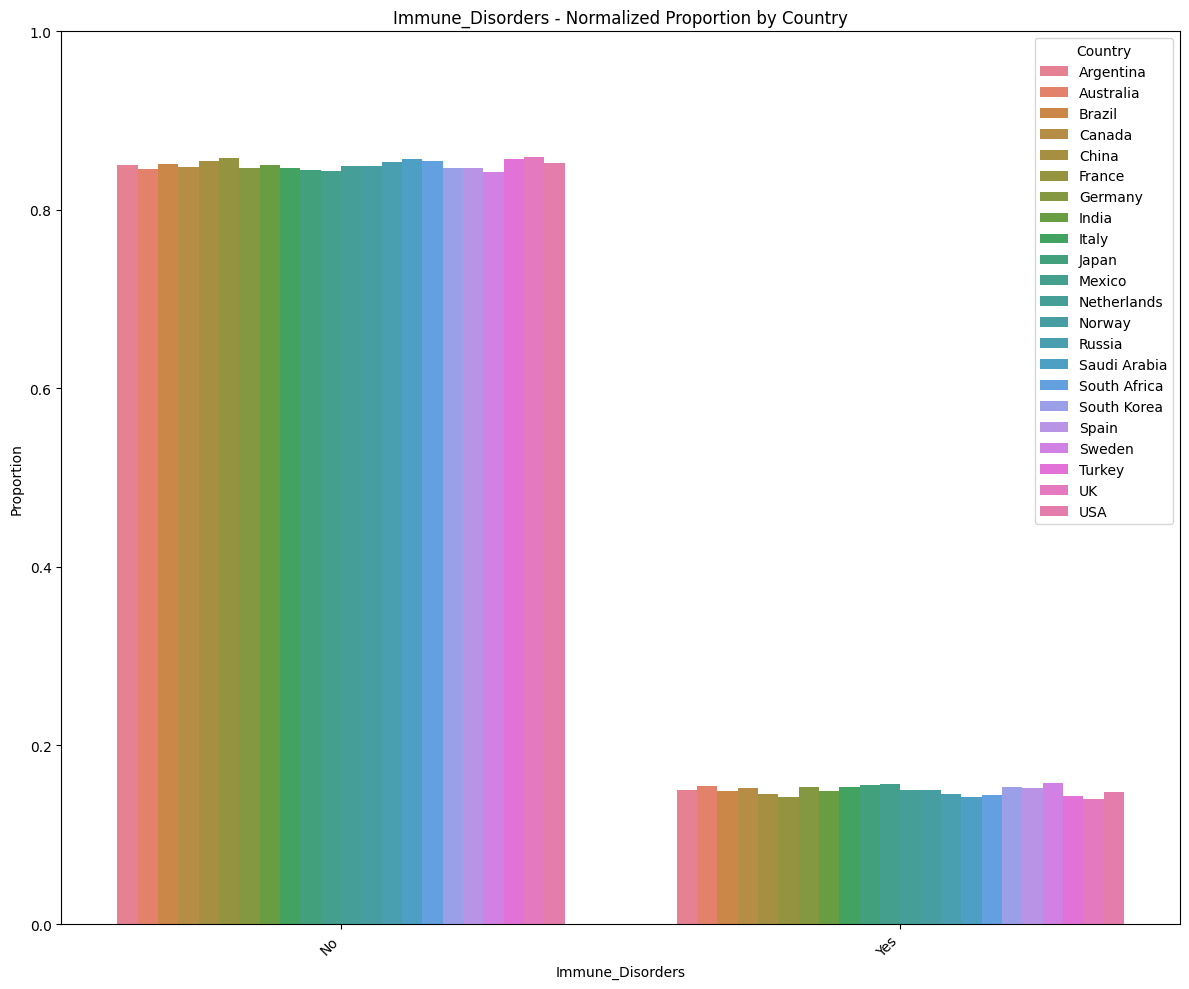

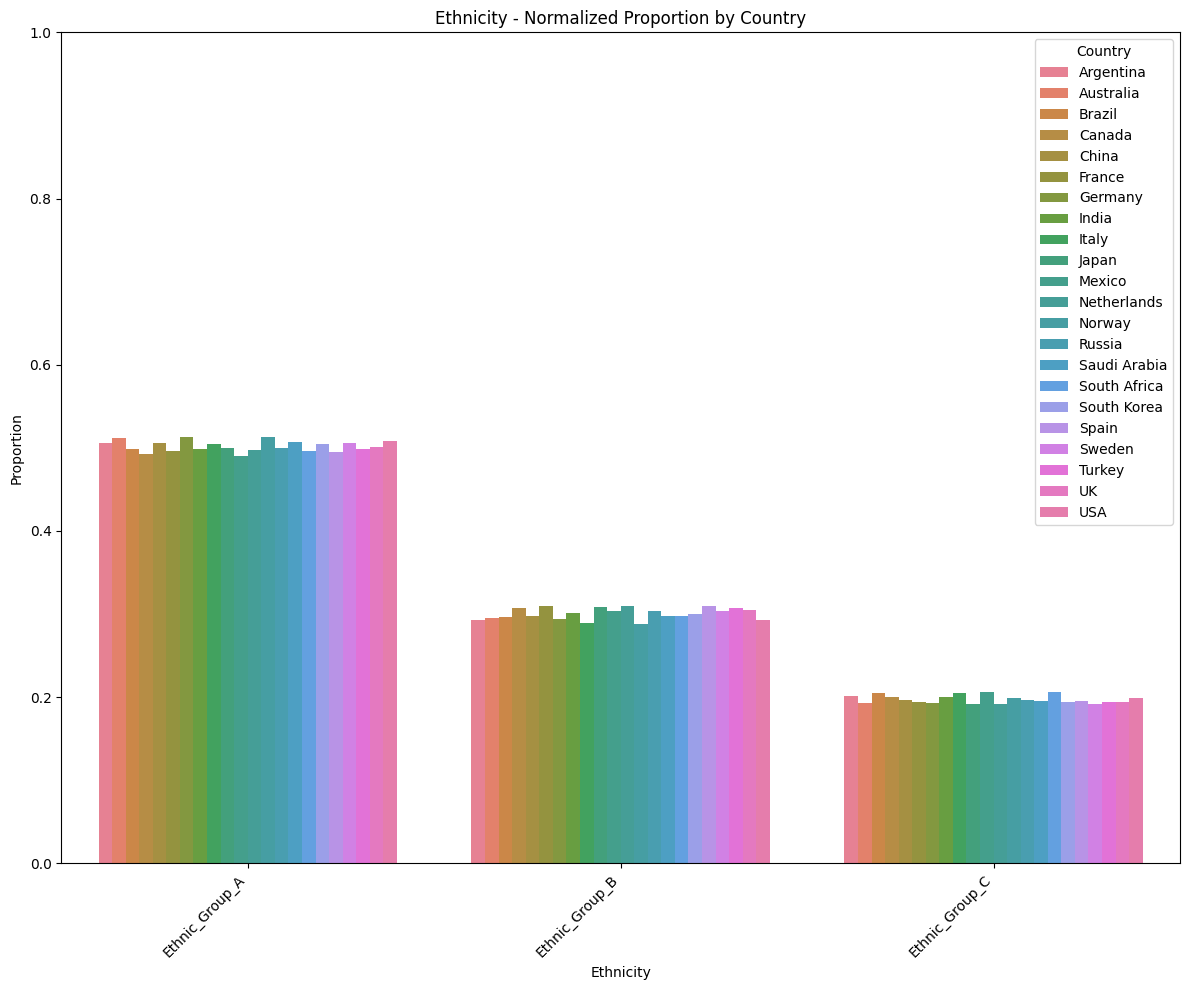

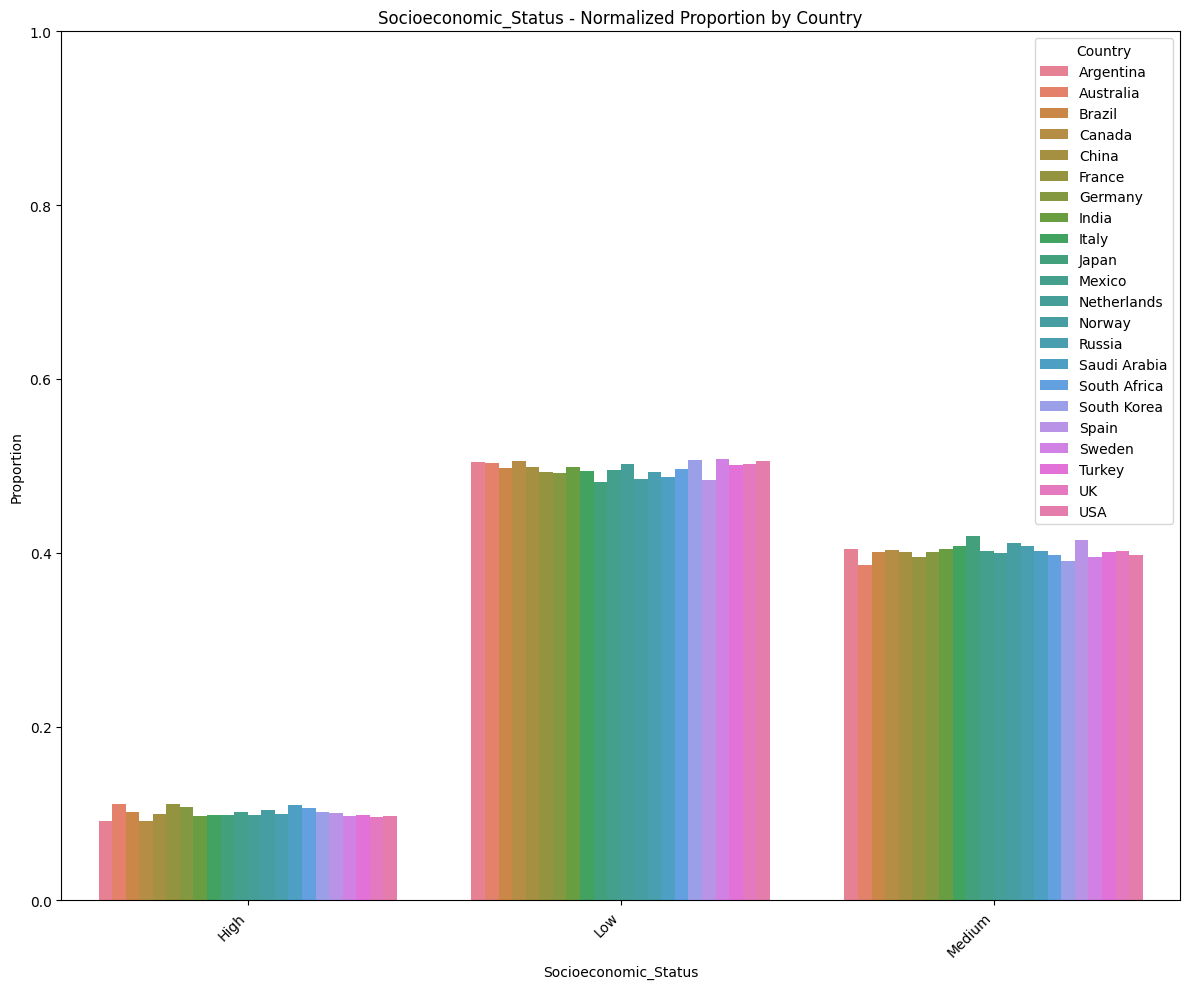

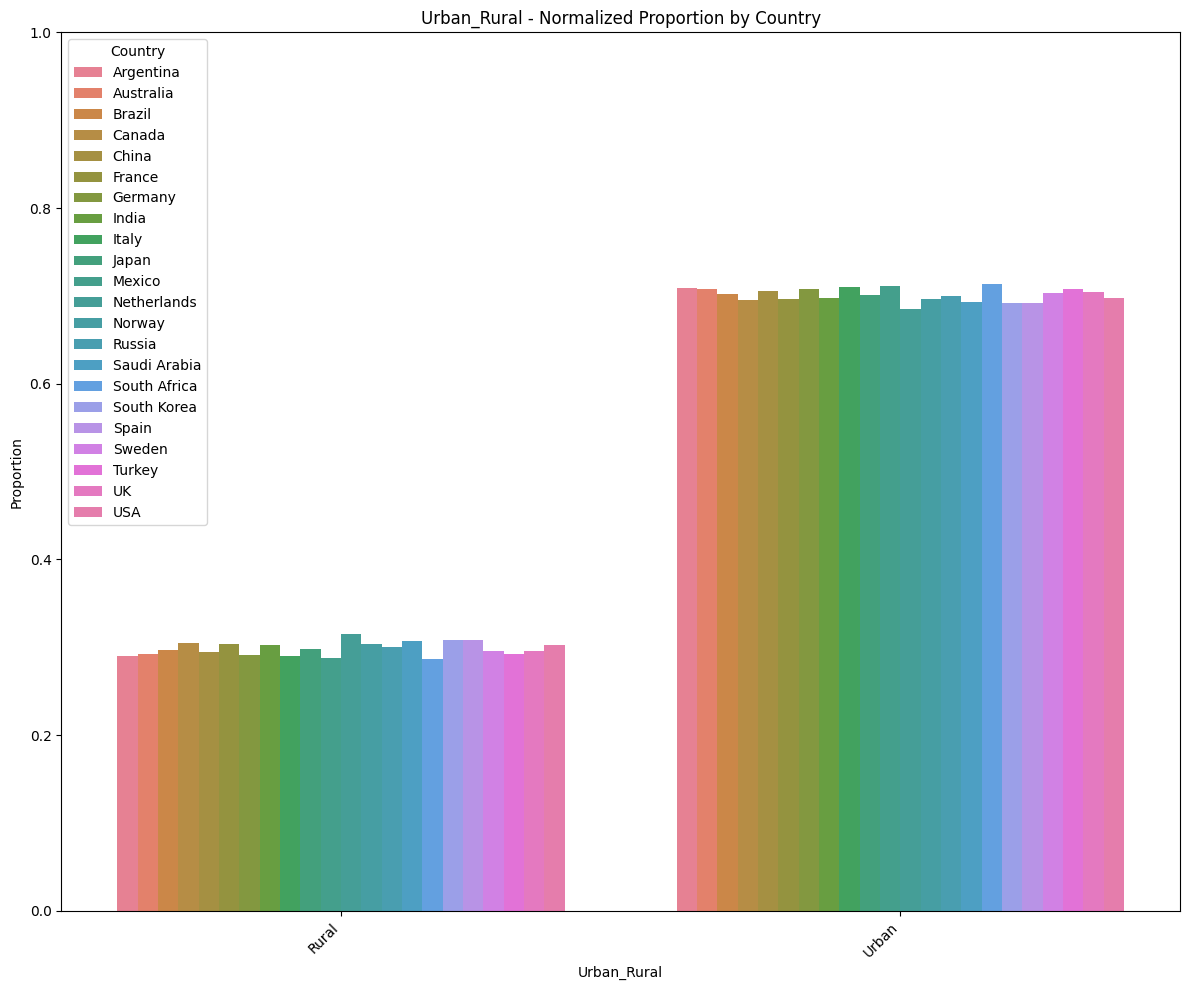

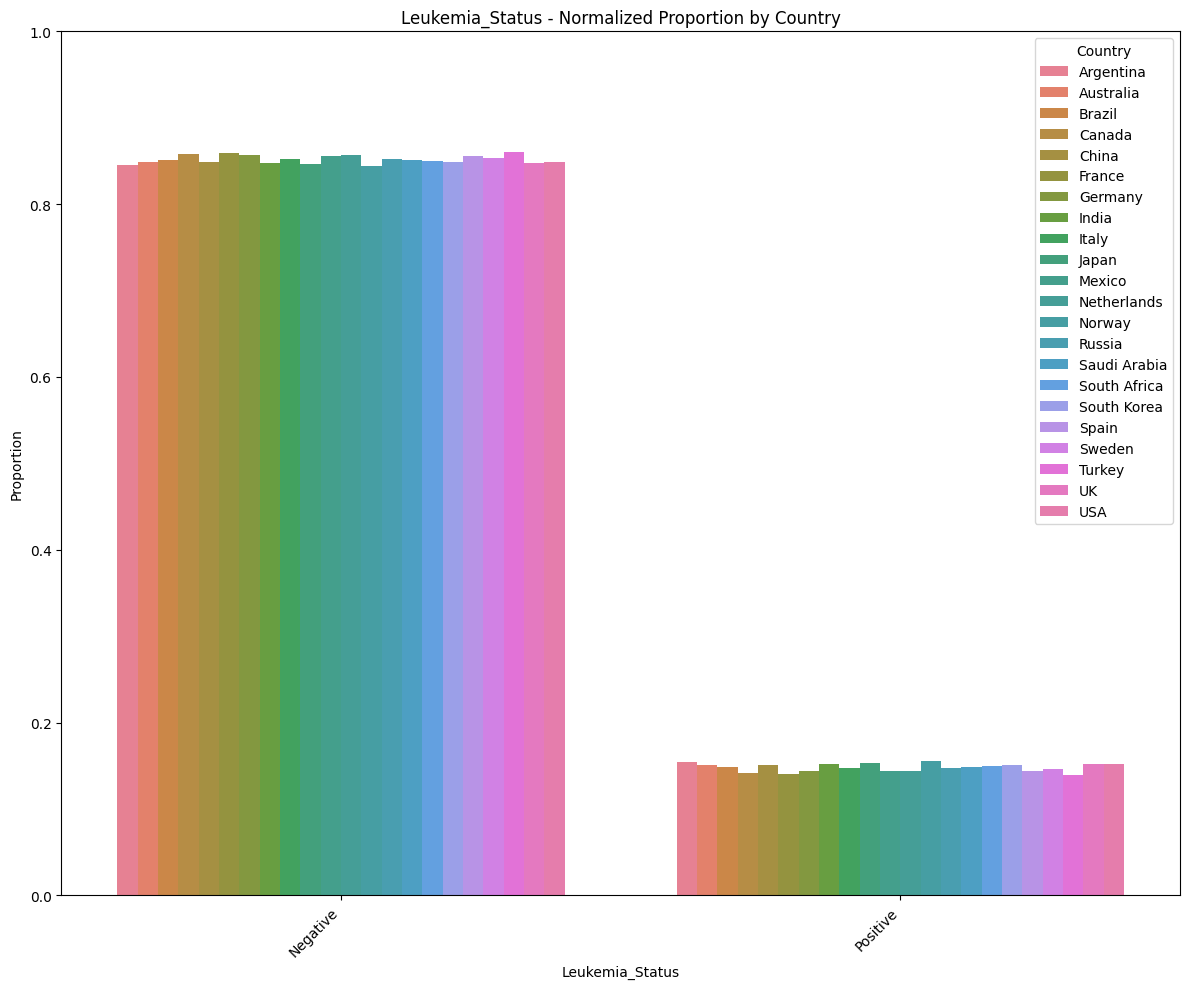

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

categorical_cols = [
    'Gender', 'Genetic_Mutation', 'Family_History',
    'Smoking_Status', 'Alcohol_Consumption', 'Radiation_Exposure',
    'Infection_History', 'Chronic_Illness', 'Immune_Disorders',
    'Ethnicity', 'Socioeconomic_Status', 'Urban_Rural', 'Leukemia_Status'
]

for col in categorical_cols:
    # Step 1: Count per category-country group
    count_df = dataset.groupby(['Country', col]).size().reset_index(name='Count')

    # Step 2: Normalize by country
    count_df['Total'] = count_df.groupby('Country')['Count'].transform('sum')
    count_df['Proportion'] = count_df['Count'] / count_df['Total']

    # Step 3: Plot normalized bar chart
    plt.figure(figsize=(12, 10))
    sns.barplot(data=count_df, x=col, y='Proportion', hue='Country')
    plt.title(f'{col} - Normalized Proportion by Country')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()



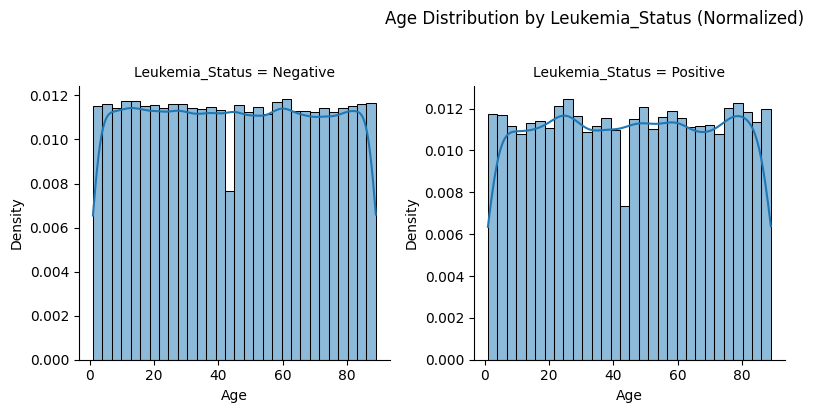

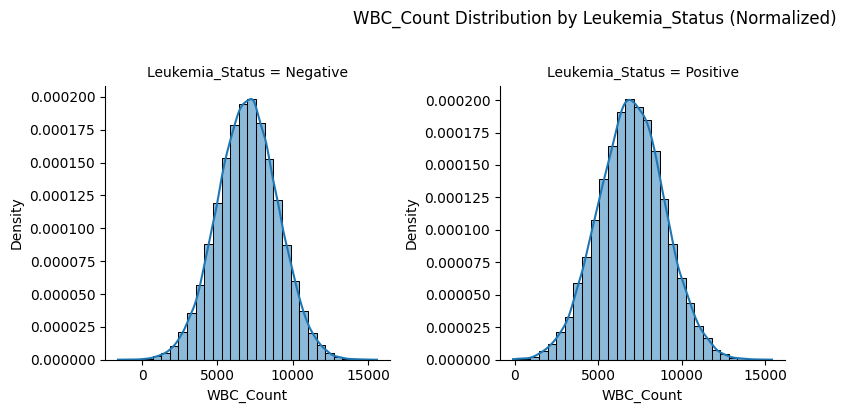

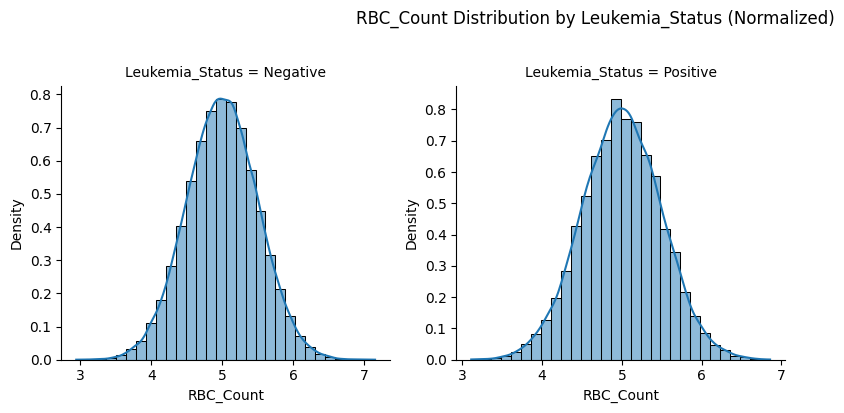

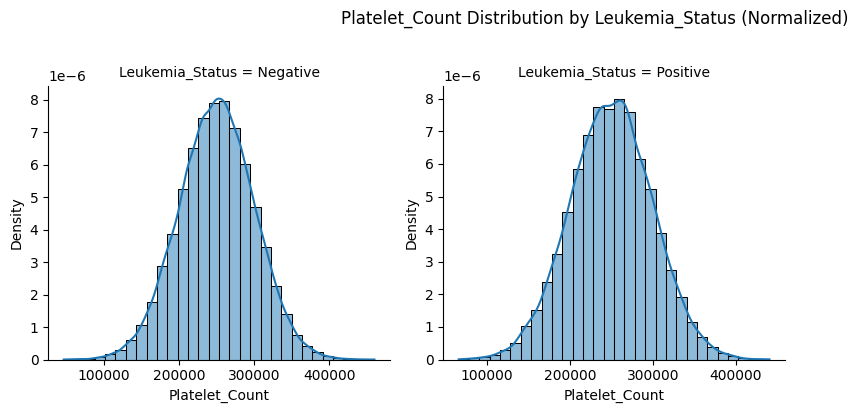

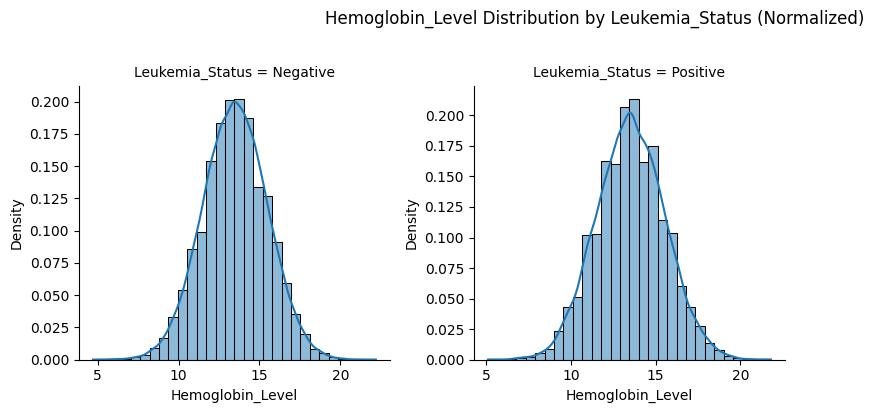

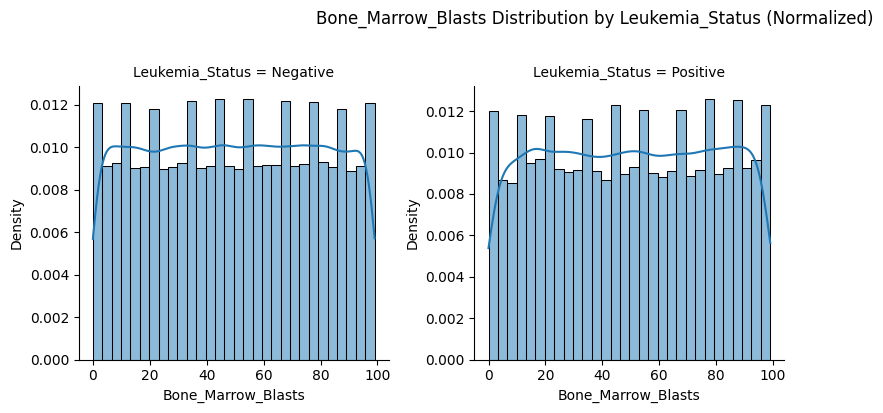

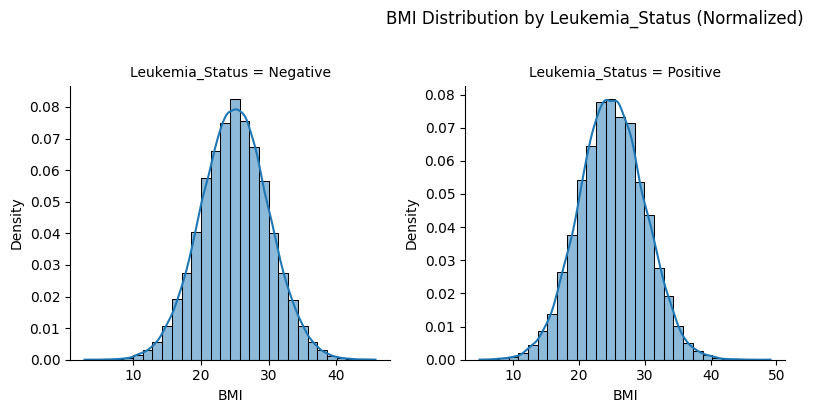

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_cols = ['Age', 'WBC_Count', 'RBC_Count', 'Platelet_Count', 
                'Hemoglobin_Level', 'Bone_Marrow_Blasts', 'BMI']

for col in numeric_cols:
    g = sns.FacetGrid(dataset, col='Leukemia_Status', col_wrap=3, height=4, sharex=False, sharey=False)
    g.map(sns.histplot, col, bins=30, kde=True, stat='density')  # <-- normalize here
    g.fig.suptitle(f'{col} Distribution by Leukemia_Status (Normalized)', y=1.02)
    plt.tight_layout()
    plt.show()



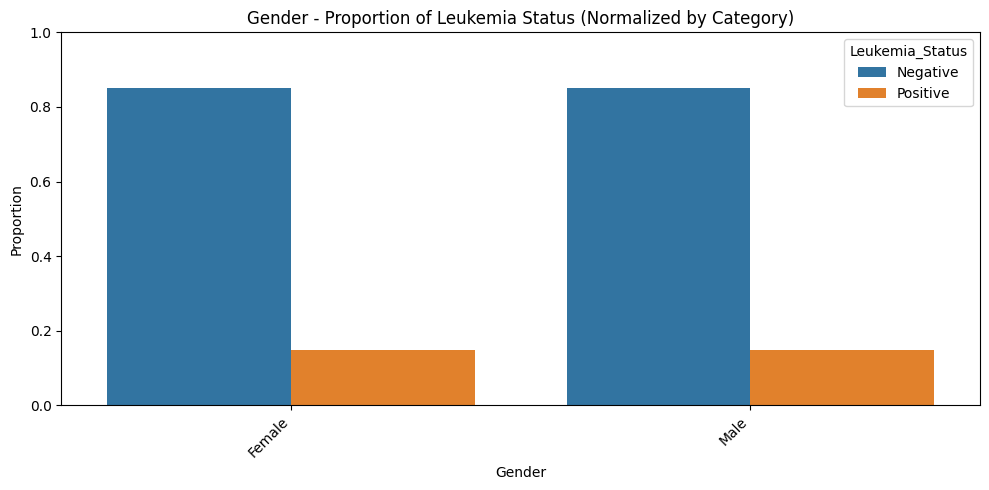

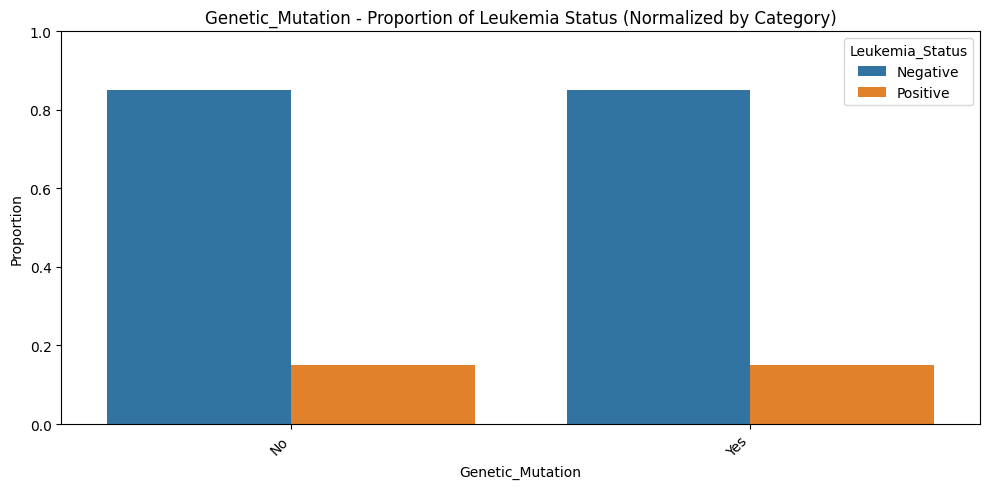

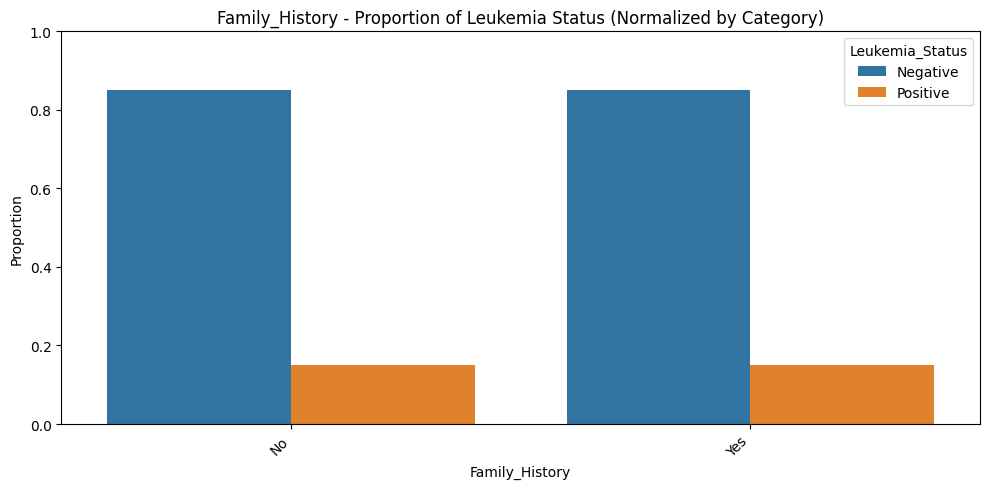

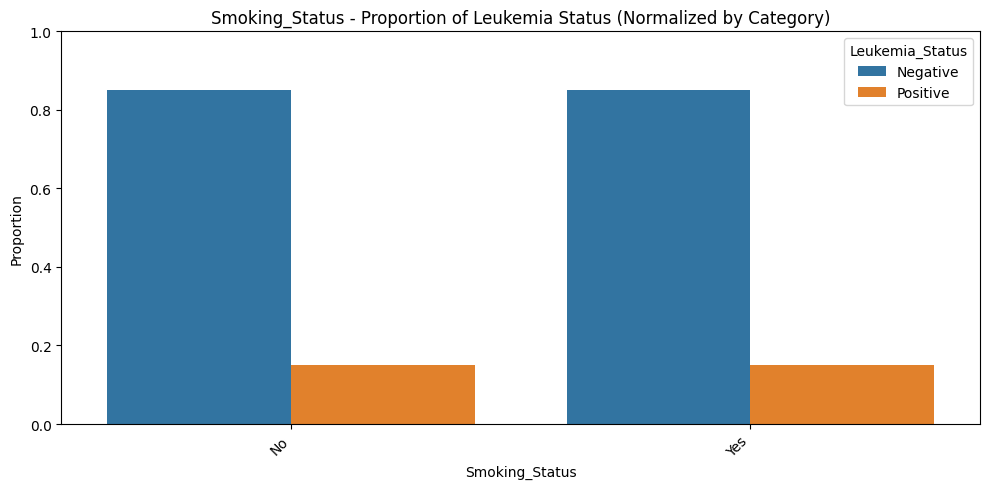

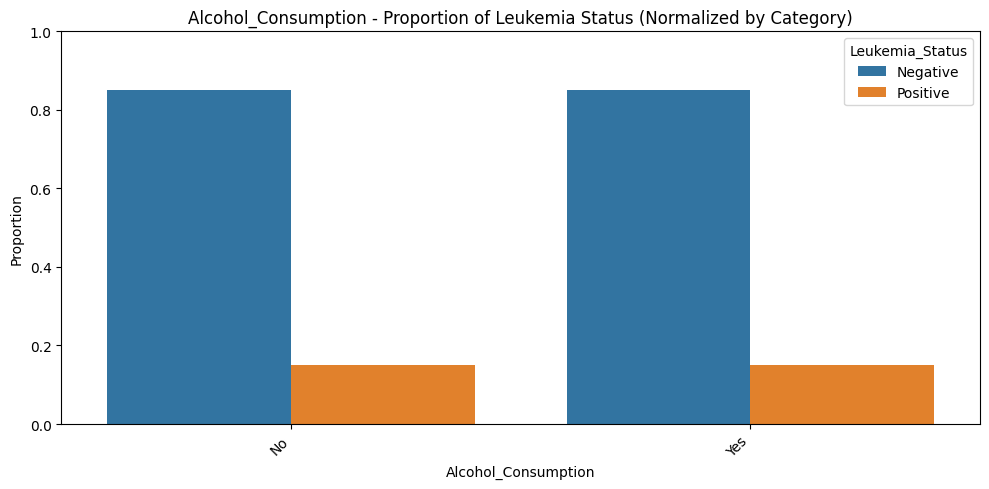

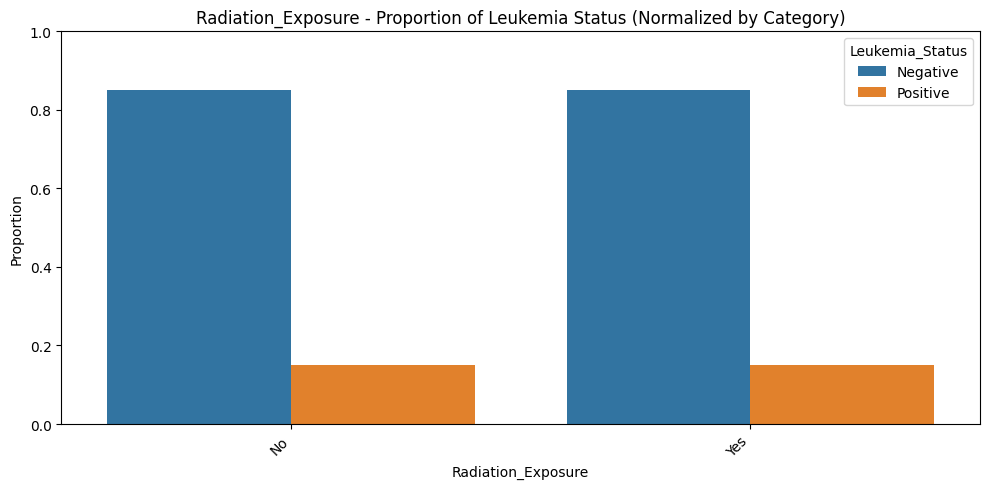

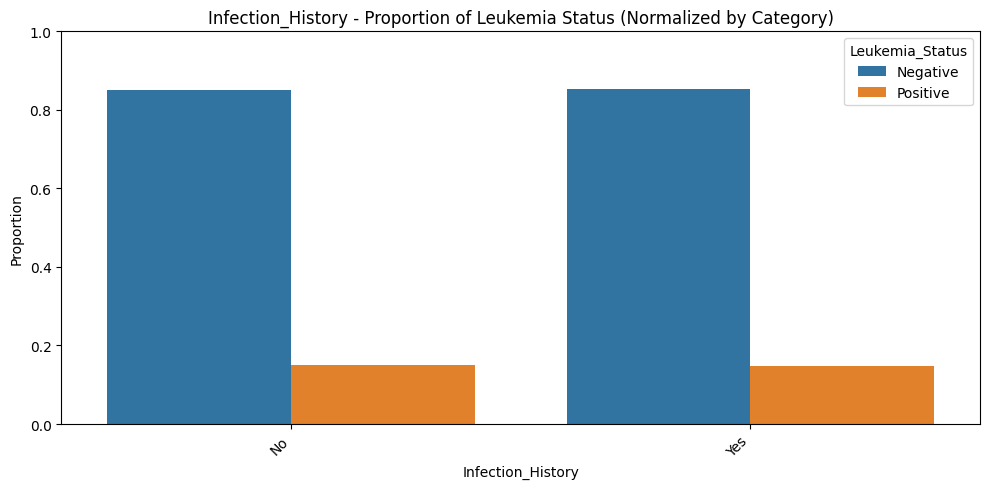

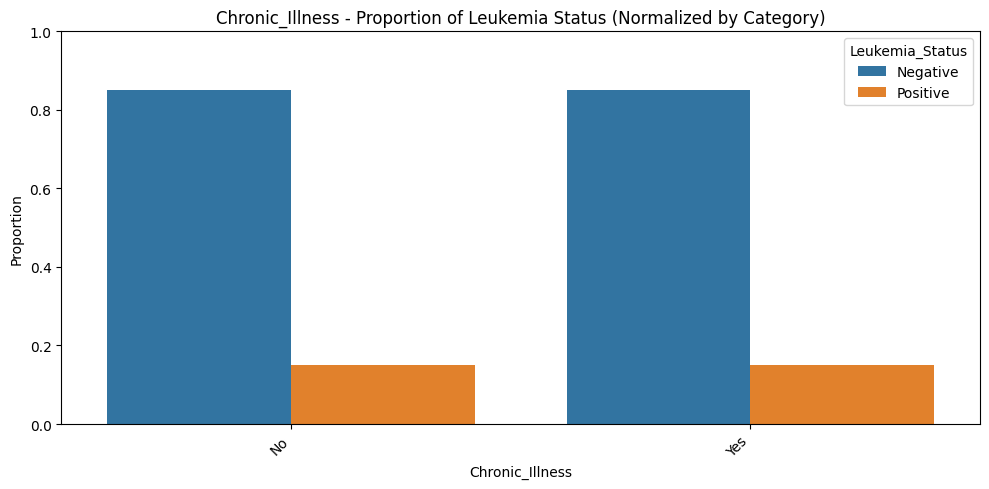

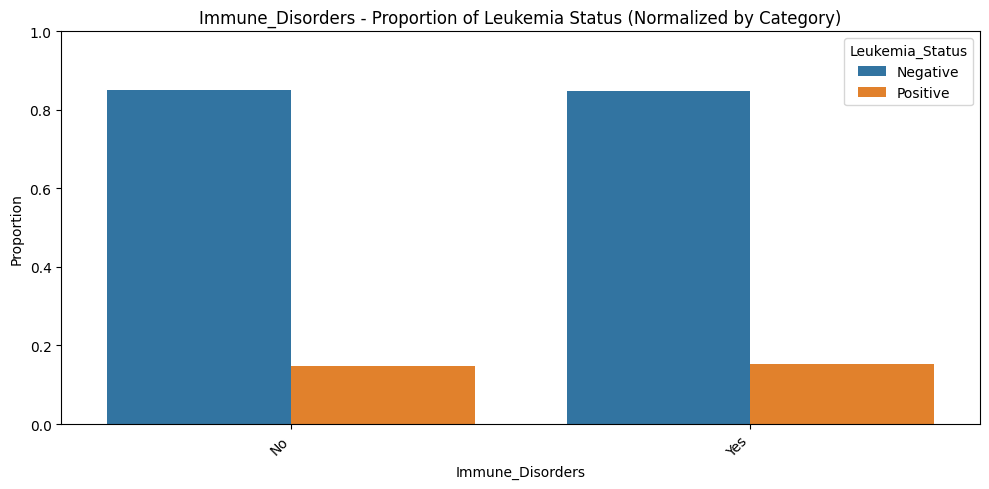

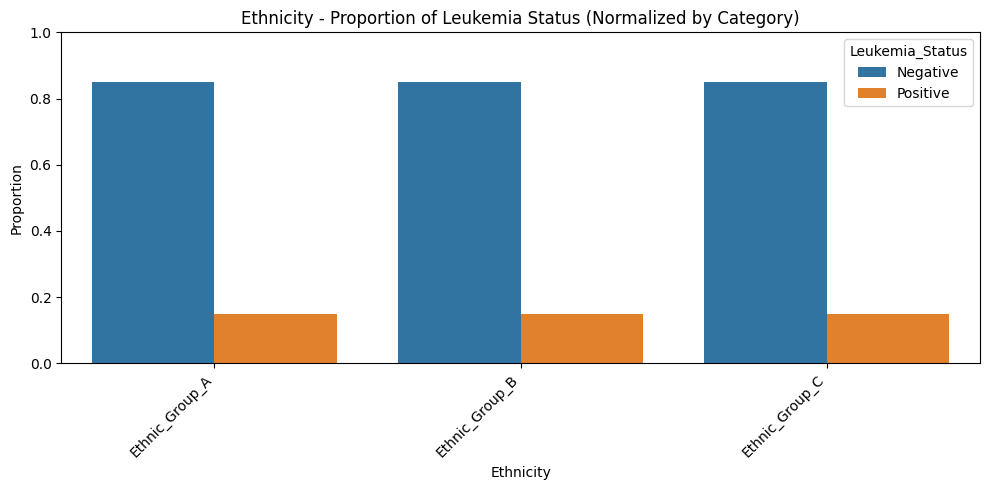

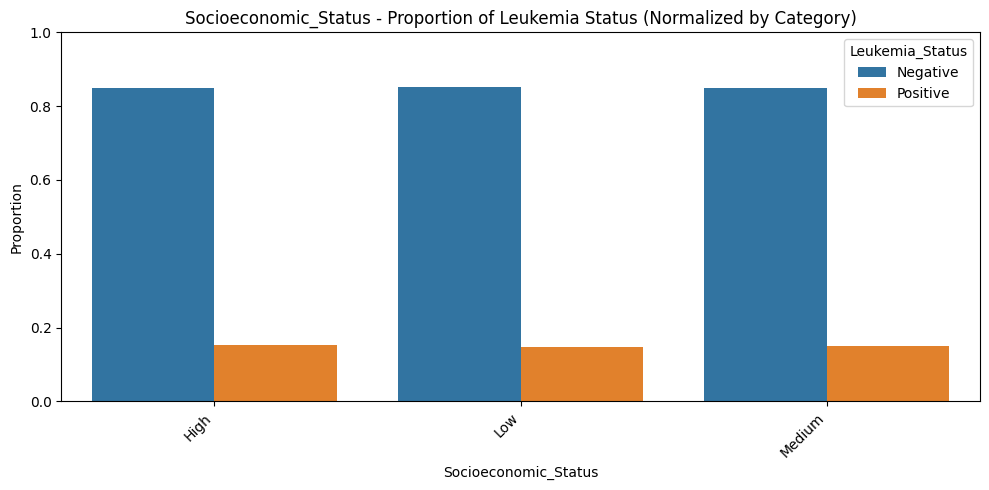

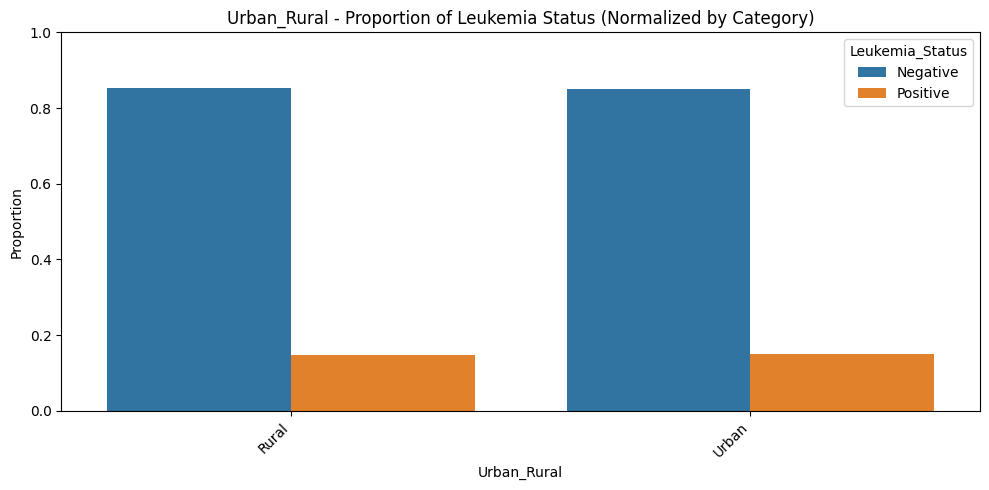

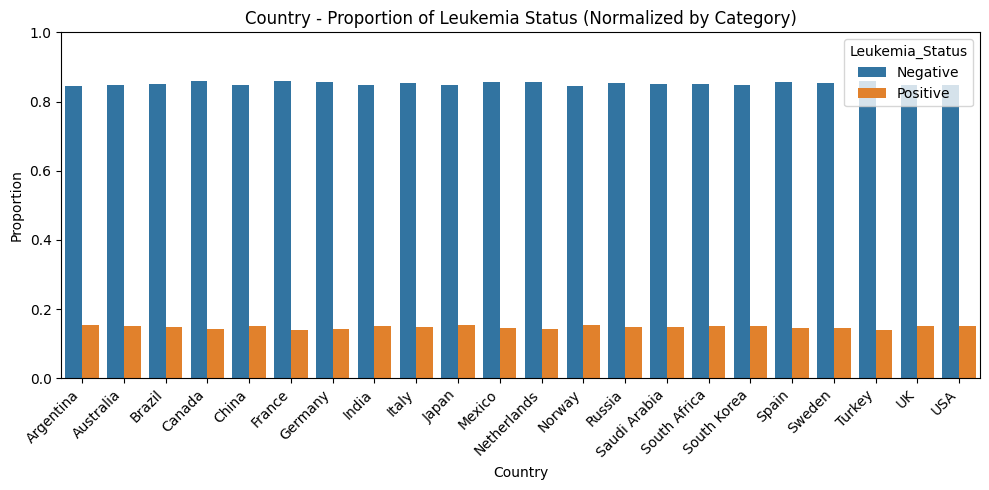

In [45]:

categorical_cols = [
    'Gender', 'Genetic_Mutation', 'Family_History',
    'Smoking_Status', 'Alcohol_Consumption', 'Radiation_Exposure',
    'Infection_History', 'Chronic_Illness', 'Immune_Disorders',
    'Ethnicity', 'Socioeconomic_Status', 'Urban_Rural', 'Country'
]

for col in categorical_cols:
    # Step 1: Count per group
    count_df = dataset.groupby([col, 'Leukemia_Status']).size().reset_index(name='Count')

    # Step 2: Normalize within each category (col)
    count_df['Total'] = count_df.groupby(col)['Count'].transform('sum')
    count_df['Proportion'] = count_df['Count'] / count_df['Total']

    # Step 3: Plot
    plt.figure(figsize=(10, 5))
    sns.barplot(data=count_df, x=col, y='Proportion', hue='Leukemia_Status')
    plt.title(f'{col} - Proportion of Leukemia Status (Normalized by Category)')
    plt.xticks(rotation=45, ha='right')
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()



# Feature Important

In [26]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
import pandas as pd

# 1. Prepare dataset
X = dataset.drop(columns=['Leukemia_Status', 'Patient_ID'])
y = dataset['Leukemia_Status']

# 2. Encode categorical features
X = pd.get_dummies(X, drop_first=True)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# 3. Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# 4. Train temporary model to get feature importances
rf_temp = RandomForestClassifier(random_state=42)
rf_temp.fit(X_resampled, y_resampled)

# 5. Get top N feature names
top_n = 20
importances = rf_temp.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_features = importance_df['Feature'].head(top_n).tolist()

# 6. Filter dataset with top N features
X_top = X_resampled[top_features]

# 7. Final train-test split
X_train, X_test, y_train, y_test = train_test_split(X_top, y_resampled, test_size=0.2, random_state=42)


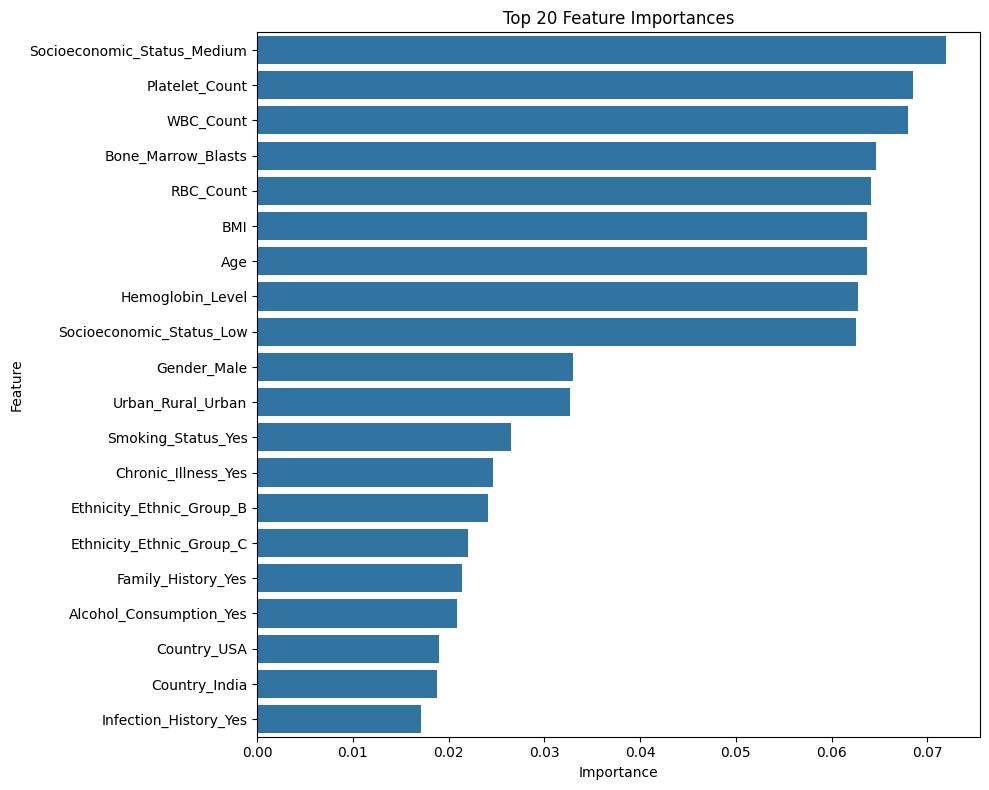

In [27]:
feature_names = X.columns
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(20))
plt.title('Top 20 Feature Importances')
plt.tight_layout()
plt.show()

In [28]:
X_train

Socioeconomic_Status_Medium  Platelet_Count  WBC_Count  \
183969                        False          265414       6853   
106367                         True          203441      11289   
108579                        False          319020       7390   
49763                          True          172546       7178   
225925                         True          277944       7184   
...                             ...             ...        ...   
119879                        False          239082       9710   
103694                        False          265203       5257   
131932                         True          330522       6493   
146867                        False          218184       6299   
121958                        False          286961       6150   

        Bone_Marrow_Blasts  RBC_Count        BMI  Age  Hemoglobin_Level  \
183969                  25   5.751175  24.141801   57         14.139621   
106367                  69   4.330000  26.500000   73         16.100000   
108579                  47   5.440000  35.800000   13         14.900000   
49763                   75   4.510000  18.500000    8         14.000000   
225925                  60   4.740679  26.885804   57         15.264197   
...                    ...        ...        ...  ...               ...   
119879                   0   4.860000  32.700000   67         13.400000   
103694                  90   5.950000  27.100000   54         16.900000   
131932                  27   5.070000  18.700000    7         15.500000   
146867                  59   5.106579  19.135254   43         14.683944   
121958                  99   5.100000  19.300000   43         14.300000   

        Socioeconomic_Status_Low  Gender_Male  Urban_Rural_Urban  \
183969                      True         True               True   
106367                     False         True              False   
108579                      True         True              False   
49763                      False        False              False   
225925                     False        False               True   
...                          ...          ...                ...   
119879                      True        False              False   
103694                      True        False              False   
131932                     False        False              False   
146867                      True         True               True   
121958                      True         True               True   

        Smoking_Status_Yes  Chronic_Illness_Yes  Ethnicity_Ethnic_Group_B  \
183969               False                 True                      True   
106367                True                 True                      True   
108579               False                 True                     False   
49763                False                False                     False   
225925               False                 True                      True   
...                    ...                  ...                       ...   
119879               False                 True                      True   
103694                True                False                     False   
131932                True                 True                     False   
146867               False                 True                     False   
121958               False                False                      True   

        Ethnicity_Ethnic_Group_C  Family_History_Yes  Alcohol_Consumption_Yes  \
183969                      True               False                    False   
106367                     False               False                    False   
108579                     False                True                     True   
49763                      False               False                     True   
225925                     False               False                     True   
...                          ...                 ...                      ...   
11987

In [29]:
y_train

array([1, 0, 0, ..., 0, 1, 0])

In [30]:
X_test

Socioeconomic_Status_Medium  Platelet_Count  WBC_Count  \
106504                         True          236990       2559   
164239                         True          287534       7385   
20475                          True          327756       8303   
48000                         False          281156      10346   
189481                         True          268737       6301   
...                             ...             ...        ...   
31251                         False          252634       8092   
225914                        False          334672       5405   
133728                        False          298133       6260   
9746                           True          147622       8729   
232426                         True          302519       9461   

        Bone_Marrow_Blasts  RBC_Count        BMI  Age  Hemoglobin_Level  \
106504                  66   5.360000  29.300000    7         13.100000   
164239                   3   5.147094  29.708787   58         14.834124   
20475                   86   5.050000  24.300000   40         15.500000   
48000                   52   4.410000  26.800000   72          9.400000   
189481                   9   5.612823  23.442648   60         14.264707   
...                    ...        ...        ...  ...               ...   
31251                   78   5.320000  23.600000   56         13.400000   
225914                  27   4.839162  23.366467   61         13.416767   
133728                  99   5.180000  20.300000   32         11.500000   
9746                    70   4.560000  23.700000   46         13.100000   
232426                  82   4.882938  28.818213   41         18.802464   

        Socioeconomic_Status_Low  Gender_Male  Urban_Rural_Urban  \
106504                     False         True               True   
164239                      True         True               True   
20475                      False         True               True   
48000                      False        False               True   
189481                      True         True               True   
...                          ...          ...                ...   
31251                      False        False               True   
225914                      True         True               True   
133728                      True         True              False   
9746                       False        False               True   
232426                     False         True               True   

        Smoking_Status_Yes  Chronic_Illness_Yes  Ethnicity_Ethnic_Group_B  \
106504               False                 True                      True   
164239               False                 True                     False   
20475                False                False                     False   
48000                 True                False                     False   
189481               False                 True                     False   
...                    ...                  ...                       ...   
31251                False                False                      True   
225914                True                 True                     False   
133728               False                 True                     False   
9746                 False                False                     False   
232426               False                False                     False   

        Ethnicity_Ethnic_Group_C  Family_History_Yes  Alcohol_Consumption_Yes  \
106504                     False               False                    False   
164239                      True               False                    False   
20475                      False               False                    False   
48000                       True               False                     True   
189481                      True                True                     True   
...                          ...                 ...                      ...   
31251

In [31]:
y_test

array([0, 1, 0, ..., 0, 0, 1])

In [32]:
# X_train = X_train.to_numpy()
# X_test = X_test.to_numpy()
X_train = np.array(X_train).astype(float)
X_test = np.array(X_test).astype(float)
y_train = np.array(y_train).astype(int)
y_test = np.array(y_test).astype(int)



# [4] Modeling with SMOTE Data Set

ANN

In [33]:
# 1. Import libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Build Model
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# 3. Compile Model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train Model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_data=(X_test, y_test),
    verbose=1
)

# 5. Predict and Evaluate
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype("int32")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(f"{accuracy_score(y_test, y_pred):.4f}")


Epoch 1/50
6090/6090 [==============================] - 8s 1ms/step - loss: 203.3606 - accuracy: 0.5033 - val_loss: 35.9748 - val_accuracy: 0.4989
Epoch 2/50
6090/6090 [==============================] - 7s 1ms/step - loss: 43.3039 - accuracy: 0.5055 - val_loss: 8.2364 - val_accuracy: 0.5010
Epoch 3/50
6090/6090 [==============================] - 6s 1ms/step - loss: 29.3779 - accuracy: 0.5101 - val_loss: 10.8554 - val_accuracy: 0.4989
Epoch 4/50
6090/6090 [==============================] - 6s 1ms/step - loss: 24.6853 - accuracy: 0.5082 - val_loss: 24.1990 - val_accuracy: 0.4989
Epoch 5/50
6090/6090 [==============================] - 6s 1ms/step - loss: 15.3156 - accuracy: 0.5137 - val_loss: 3.2830 - val_accuracy: 0.5012
Epoch 6/50
6090/6090 [==============================] - 7s 1ms/step - loss: 9.5437 - accuracy: 0.5193 - val_loss: 0.7634 - val_accuracy: 0.6706
Epoch 7/50
6090/6090 [==============================] - 7s 1ms/step - loss: 4.8328 - accuracy: 0.5254 - val_loss: 6.2292 - val_

c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


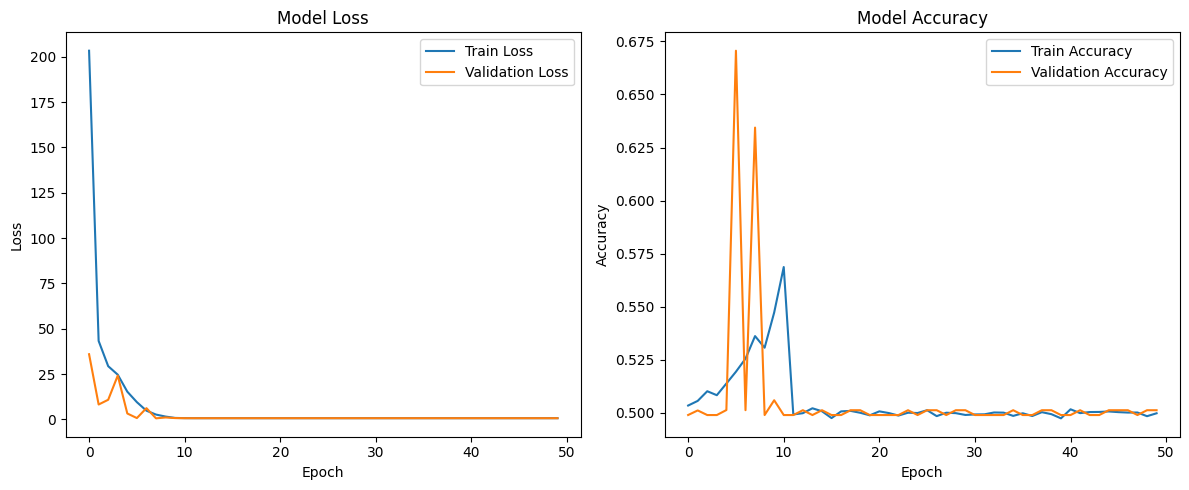

In [34]:
import matplotlib.pyplot as plt

# Plot training & validation loss
plt.figure(figsize=(12,5))

# Loss
plt.subplot(1,2,1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1,2,2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


Random Forest

✅ Random Forest Model Accuracy: 0.8416

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85     24304
           1       0.90      0.77      0.83     24415

    accuracy                           0.84     48719
   macro avg       0.85      0.84      0.84     48719
weighted avg       0.85      0.84      0.84     48719



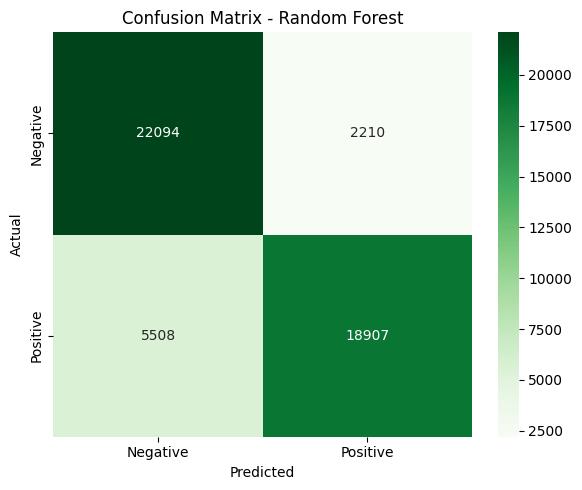

In [35]:
# 1. Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Create and Train Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    random_state=42,
    n_jobs=-1             # use all CPU cores
)
rf_model.fit(X_train, y_train)

# 3. Predict and Evaluate
y_pred = rf_model.predict(X_test)

# Accuracy
acc = accuracy_score(y_test, y_pred)
print(f"✅ Random Forest Model Accuracy: {acc:.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)

# 4. Plot Confusion Matrix
plt.figure(figsize=(6,5))
sns.heatmap(
    conf_mat,
    annot=True,
    fmt='d',
    cmap='Greens',
    xticklabels=['Negative', 'Positive'],
    yticklabels=['Negative', 'Positive']
)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.tight_layout()
plt.show()


TabNet

In [36]:
# 1. Import libraries
import matplotlib.pyplot as plt
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 2. Create and Train TabNet Model
clf = TabNetClassifier(
    verbose=1,
    seed=42
)

clf.fit(
    X_train, y_train,
    eval_set=[(X_test, y_test)],
    eval_name=['valid'],
    eval_metric=['accuracy'],
    max_epochs=50,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128
)

# 3. Predict
y_pred = clf.predict(X_test)

# 4. Evaluate
print(f"✅ Test Accuracy: {accuracy_score(y_test, y_pred):.4f}")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")


epoch 0  | loss: 0.52654 | valid_accuracy: 0.73846 |  0:00:27s
epoch 1  | loss: 0.46248 | valid_accuracy: 0.78175 |  0:00:54s
epoch 2  | loss: 0.45299 | valid_accuracy: 0.78688 |  0:01:20s
epoch 3  | loss: 0.4463  | valid_accuracy: 0.79111 |  0:01:46s
epoch 4  | loss: 0.44369 | valid_accuracy: 0.79014 |  0:02:11s
epoch 5  | loss: 0.44172 | valid_accuracy: 0.79181 |  0:02:36s
epoch 6  | loss: 0.44114 | valid_accuracy: 0.79109 |  0:03:03s
epoch 7  | loss: 0.43873 | valid_accuracy: 0.79501 |  0:03:29s
epoch 8  | loss: 0.43765 | valid_accuracy: 0.78858 |  0:03:54s
epoch 9  | loss: 0.44066 | valid_accuracy: 0.79632 |  0:04:20s
epoch 10 | loss: 0.43662 | valid_accuracy: 0.79538 |  0:04:46s
epoch 11 | loss: 0.43587 | valid_accuracy: 0.79468 |  0:05:12s
epoch 12 | loss: 0.43531 | valid_accuracy: 0.79737 |  0:05:37s
epoch 13 | loss: 0.43511 | valid_accuracy: 0.79564 |  0:06:03s
epoch 14 | loss: 0.43463 | valid_accuracy: 0.79525 |  0:06:29s
epoch 15 | loss: 0.43491 | valid_accuracy: 0.79564 |  0

c:\Users\temmy\anaconda3\envs\tf210\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)


✅ Test Accuracy: 0.7974

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.89      0.81     24304
           1       0.86      0.71      0.78     24415

    accuracy                           0.80     48719
   macro avg       0.81      0.80      0.80     48719
weighted avg       0.81      0.80      0.80     48719


Confusion Matrix:
[[21602  2702]
 [ 7170 17245]]


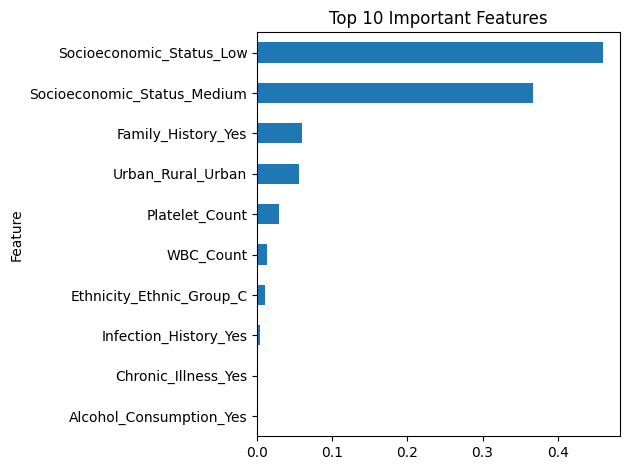

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Get feature names before train_test_split
feature_names = X_top.columns.tolist() 

# 2. Get feature importances
feat_importances = clf.feature_importances_

# 3. Create importance DataFrame
feat_imp_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feat_importances
}).sort_values('Importance', ascending=False)

# 4. Plot
feat_imp_df.head(10).plot.barh(x='Feature', y='Importance', legend=False)
plt.title('Top 10 Important Features')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
